In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert(0, "C:/workspace/data-science//libs")
from big_numbers import contract_18_decimals_to_float

# Prereading tables

In [78]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [2]:
tokens_addresses_to_names_dict = {
    "0x86f1e0420c26a858fc203a3645dd1a36868f18e5": "vBTC",
    "0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb": "vETH",
    "0x5faa136fc58b6136ffdaeaac320076c4865c070f": "vAVAX",
    "0xb24f50dd9918934ab2228be7a097411ca28f6c14": "vLUNA",
    "0x151bb01c79f4516c233948d69dae39869bccb737": "vSOL",
    "0x7161c3416e08abaa5cd38e68d9a28e43a694e037": "vCRV",
    "0x333b1ea429a88d0dd48ce7c06c16609cd76f43a8": "vSAND",
    "0x2f198182ec54469195a4a06262a9431a42462373": "vLINK",
    "0x5f714b5347f0b5de9f9598e39840e176ce889b9c": "vATOM",
    "0x77d0cc9568605bfff32f918c8ffaa53f72901416": "vONE",
    "0x3fb3282e3ba34a0bff94845f1800eb93cc6850d4": "vNEAR",
    "0x2db8d2db86ca3a4c7040e778244451776570359b": "vFTM",
    "0x7eada83e15acd08d22ad85a1dce92e5a257acb92": "vFLOW",
    "0xb6599bd362120dc70d48409b8a08888807050700": "vBNB",
    "0x9482aafdced6b899626f465e1fa0cf1b1418d797": "vPERP",
    "0xbe5de48197fc974600929196239e264ecb703ee8": "vMATIC",
    "0x34235c8489b06482a99bb7fcab6d7c467b92d248": "vAAVE",
    "0x9d34f1d15c22e4c0924804e2a38cbe93dfb84bc2": "vAPE"
}

In [3]:
master_trader_df = pd.read_csv("master_trader.csv")
master_trader_df.drop(columns=["Unnamed: 0", "tx_hash"], inplace=True)
master_trader_df["time"] = pd.to_datetime(master_trader_df["timestamp"], unit='s')
master_trader_df

,trader,exchanged_position_size,exchanged_position_notional,fee,open_notional,realized_pnl,position_size_after,swapped_price,entry_price_after,market_price_after,...,mark_twap,index_twap,daily_funding_rate,deposit,withdraw,liquidator,liquidation_fee,position_size_abs,position_notional_abs,block_number
0,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,250000.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54295.708000,55072.675000,-0.014108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4104.856899,4167.914502,-0.015129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54295.708000,55072.675000,-0.014108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7522802,0x66465ad392942e78f8147ae565a43f174071822b,-63.016538,1007.767544,1.007768,77543.167127,0.0,-4785.063498,15.992112,16.205254,15.968758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7522803,0x31789f360b9aab20837a35944904deb540533357,-5.821204,1250.535778,1.250536,28511.176773,0.0,-132.045808,214.824254,215.918833,214.596023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7522804,0xdab8a2e0b213ec8447d4f7cdb783d53ed3428b7a,-3419.000000,806.897384,0.806897,806.090487,0.0,-3419.000000,0.236004,0.235768,0.235708,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7522805,0x0cbdd4a3861ba3b2e0f68cea10209a606d38aeca,-1220.524515,750.778051,0.750778,74113.308142,0.0,-122785.420591,0.615127,0.603600,0.614201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
liquidity_changes_df = pd.read_csv("liquidity_changes.csv")
liquidity_changes_df["time"] = pd.to_datetime(liquidity_changes_df["timestamp"], unit='s')
liquidity_changes_df["day_of_year"] = liquidity_changes_df["time"].dt.dayofyear
liquidity_changes_df["pool_name"] = liquidity_changes_df["base_token"].replace(tokens_addresses_to_names_dict)
liquidity_changes_df.drop(columns=["base_token", "tx_hash", "from_function_signature"], inplace=True)
liquidity_changes_df["lower_bound"] = pow(1.0001, liquidity_changes_df["lower_tick"])
liquidity_changes_df["upper_bound"] = pow(1.0001, liquidity_changes_df["upper_tick"])
liquidity_changes_df["fixed_liquidity"] = [contract_18_decimals_to_float(liquidity_record) for 
                                           liquidity_record in liquidity_changes_df["liquidity"]]
liquidity_changes_df.drop(columns=["Unnamed: 0", "quote_token", "lower_tick", "upper_tick", "liquidity"], 
                          inplace=True)
liquidity_changes_df["central_bound"] = (liquidity_changes_df["upper_bound"] + liquidity_changes_df["lower_bound"]) / 2
liquidity_changes_df.sort_values("block_number_log_index", inplace=True)
liquidity_changes_df = liquidity_changes_df.reset_index()
liquidity_changes_df.drop(columns=["index"], inplace=True)

liquidity_changes_df

,id,maker,base,quote,quote_fee,block_number_log_index,block_number,timestamp,time,day_of_year,pool_name,lower_bound,upper_bound,fixed_liquidity,central_bound
0,0xec1e410b931f920c4aa3ae105e63463142b310fbe959...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0.000921,50.000000,0.000000,515552004,515552,1638000985,2021-11-27 08:16:25,331,vBTC,2.954278e-39,3.384921e+38,0.214579,1.692461e+38
1,0x7dba9c535f6c595ab39eeec818d89b34783442bafa81...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0.012181,50.000000,0.000000,515554004,515554,1638000985,2021-11-27 08:16:25,331,vETH,2.954278e-39,3.384921e+38,0.780407,1.692461e+38
2,0xc438a7cd8fee202ce2b53761811ef05f85095933b27e...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,3.572179,200000.000000,0.000000,515555003,515555,1638000985,2021-11-27 08:16:25,331,vBTC,5.171263e+04,5.692287e+04,35648.835497,5.431775e+04
3,0x7871b4fe6113ac31c8be911146b109575cfb9ee90b13...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,46.254982,200000.000000,0.000000,515557003,515557,1638000985,2021-11-27 08:16:25,331,vETH,3.895536e+03,4.313830e+03,120851.329740,4.104683e+03
4,0x653f9413a9c8df27d2800bbb71f06fd20b6d825b3d38...,0x35952141922ee99a04e016c967c3f0ad589ea958,0.100000,472.798469,0.000000,516478004,516478,1638003992,2021-11-27 09:06:32,331,vETH,3.990155e+03,4.288026e+03,386.315245,4.139091e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130054,0xf3155f56c66c05c95611e7947304853aab760c5ff395...,0xd3fab52a0c93346f23a9b9b24fd45ea0b8dd3420,-1683.962836,0.000000,144.993911,11554393008,11554393,1655117811,2022-06-13 10:56:51,164,vAAVE,5.948926e+01,7.164952e+01,-146260.729784,6.556939e+01
130055,0xc8c4310f0bb74d949669849479190ba4b1eebee33f58...,0x377e6326a8e2ce4a856d31605ca33505ad2b57b1,1435.815543,4999.462445,0.000000,11554604003,11554604,1655117891,2022-06-13 10:58:11,164,vAPE,3.478628e-01,3.487682e+01,3917.139686,1.761234e+01
130056,0x8e7f48783a1d80dc4a058e7595f89d5d485d9d054f27...,0xd3fab52a0c93346f23a9b9b24fd45ea0b8dd3420,1708.506923,0.000000,0.000000,11554671003,11554671,1655117952,2022-06-13 10:59:12,164,vAAVE,5.877969e+01,7.037143e+01,152196.723027,6.457556e+01
130057,0xb7473ff85536e28acf2175d68acbbf68351a02dd7a7a...,0x377e6326a8e2ce4a856d31605ca33505ad2b57b1,-331.643015,-4978.735548,2.235039,11555163007,11555163,1655118198,2022-06-13 11:03:18,164,vAVAX,1.512826e+00,1.516763e+02,-1878.686957,7.659458e+01


# Making impermanent loss table and visualization

In [5]:
def get_and_show_impermanent_loss(trading_df: pd.DataFrame, liquidity_df: pd.DataFrame,
                                  maker: str, token: str, xsize: int=14, ysize: int=7) -> pd.DataFrame:

        """get table of impermanent loss based on swap prices and visualize it

        Args:
                trading_df (pd.DataFrame): history of trades containing swap prices;
                liquidity_df (pd.DataFrame): history of applied liquidity changes;
                maker (str): hash address of required maker;
                token (str): name of the reviewable token;
                xsize (int): horizontal size of visualization;
                ysuze (int): vertical size of visualization;

        Returns:
                pd.DataFrame: liquidity changes with specification of impermanent loss
        """
        
        maker_pool_df = liquidity_df[(liquidity_df["maker"] == maker) &
                                        (liquidity_df["pool_name"] == token)][["maker", "time", "base", "quote", 
                                                                                "quote_fee", "lower_bound", "upper_bound"]]
        token_price_df = trading_df[trading_df["pool_name"] == token][["time", "swapped_price"]].dropna()

        token_price_df = token_price_df.set_index("time")
        token_price_df = token_price_df.resample("1T").mean()
        token_price_df.loc[(token_price_df["swapped_price"] <= (token_price_df["swapped_price"].median() / 100)), 
                        "swapped_price"] = np.NaN
        token_price_df = token_price_df.fillna(method='ffill')

        maker_pool_df["time"] = [datetime(time.year, time.month, time.day,
                                        time.hour, time.minute) 
                                for time in maker_pool_df["time"]]

        maker_pool_df = maker_pool_df.merge(token_price_df, on="time", how='inner')
        maker_pool_df["base_balance"] = maker_pool_df["base"].cumsum()
        maker_pool_df["prev_base_balance"] = maker_pool_df["base_balance"].shift(1)
        maker_pool_df["prev_swapped_price"] = maker_pool_df["swapped_price"].shift(1)
        maker_pool_df["swapped_impermanent_loss"] = ((maker_pool_df["prev_swapped_price"] - maker_pool_df["swapped_price"]) *
                                                maker_pool_df["prev_base_balance"])

        fig, ax = plt.subplots(figsize=(14, 7))
        ax.plot(maker_pool_df["time"], maker_pool_df["swapped_impermanent_loss"])
        ax.set_xlabel("time")
        ax.set_ylabel("USD")
        ax.set_title("Impermanent loss based on swap price for " + token)
        ax.grid(True, linestyle='--')
        plt.show()

        return maker_pool_df

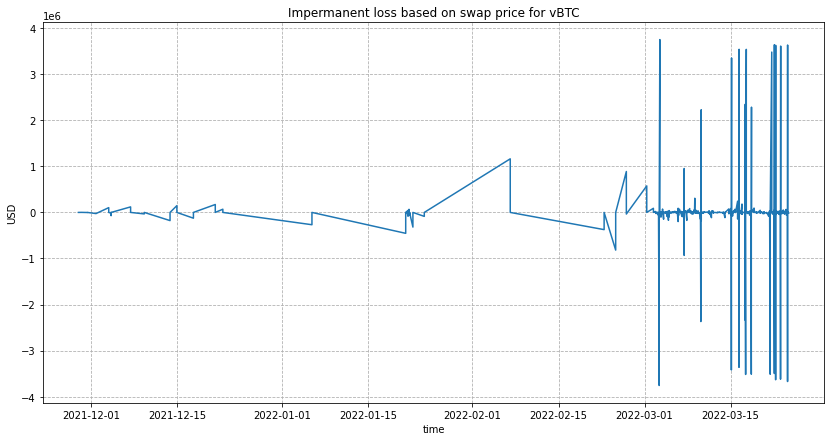

In [6]:
maker_pool_liquidity = get_and_show_impermanent_loss(trading_df=master_trader_df, liquidity_df=liquidity_changes_df, 
                                                     maker="0x9c1e0c67aa30c063f341885b12cb81cc94613fc7",
                                                     token="vBTC")

In [7]:
maker_pool_liquidity

,maker,time,base,quote,quote_fee,lower_bound,upper_bound,swapped_price,base_balance,prev_base_balance,prev_swapped_price,swapped_impermanent_loss
0,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,2021-11-28 21:44:00,3.255201,2.000000e+05,0.000000,5.360810e+04,5.900932e+04,56249.389746,3.255201,NaN,NaN,NaN
1,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,2021-11-28 21:44:00,-0.741848,-3.565714e+05,761.152618,5.171263e+04,5.692287e+04,56249.389746,2.513352,3.255201,56249.389746,0.000000
2,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,2021-11-29 09:40:00,-0.000896,-5.140477e+01,0.006881,2.954278e-39,3.384921e+38,55821.168597,2.512457,2.513352,56249.389746,1076.270677
3,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,2021-11-30 08:41:00,-2.800218,-2.257253e+05,607.217814,5.360810e+04,5.900932e+04,56541.137090,-0.287761,2.512457,55821.168597,-1808.889693
4,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,2021-11-30 08:41:00,16.267975,1.000000e+06,0.000000,5.328743e+04,6.008105e+04,56541.137090,15.980214,-0.287761,56541.137090,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
867,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,2022-03-24 09:06:00,-0.001449,-6.235489e+01,0.000000,3.317260e+04,5.590748e+04,43077.671935,-174.790066,-174.788617,43077.671935,-0.000000
868,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,2022-03-24 09:06:00,2.902825,1.249265e+05,0.000000,3.317260e+04,5.590748e+04,43077.671935,-171.887241,-174.790066,43077.671935,-0.000000
869,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,2022-03-24 09:37:00,2.838812,1.250000e+05,0.000000,3.297417e+04,5.590748e+04,43055.721185,-169.048429,-171.887241,43077.671935,-3773.053870
870,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,2022-03-24 09:37:00,-2.884910,-1.256986e+05,14.853304,3.317260e+04,5.590748e+04,43055.721185,-171.933339,-169.048429,43055.721185,-0.000000


# Improving the impermanent loss

Current version of impermanent loss is calculated considering only base token. Considering that one of the updates coming to the Perpetual V2 was in providing other tokens (not only USD stablecoin) as collateral ones till the last moment this aspect was skipped, but even after passed first two quarters of the 2022 and the first financial quarter of 2022 it is required to add collateral token loss

In [106]:
def get_and_show_impermanent_loss(trading_df: pd.DataFrame, liquidity_df: pd.DataFrame,
                                  maker: str, token: str, xsize: int=14, ysize: int=7) -> pd.DataFrame:

        """get table of impermanent loss based on swap prices and visualize it

        Args:
                trading_df (pd.DataFrame): history of trades containing swap prices;
                liquidity_df (pd.DataFrame): history of applied liquidity changes;
                maker (str): hash address of required maker;
                token (str): name of the reviewable token;
                xsize (int): horizontal size of visualization;
                ysuze (int): vertical size of visualization;

        Returns:
                pd.DataFrame: liquidity changes with specification of impermanent loss
        """
        
        maker_pool_df = liquidity_df[(liquidity_df["maker"] == maker) &
                                        (liquidity_df["pool_name"] == token)][["maker", "time", "base", "quote", 
                                                                                "quote_fee", "lower_bound", "upper_bound"]]
        token_price_df = trading_df[trading_df["pool_name"] == token][["time", "swapped_price"]].dropna()

        token_price_df = token_price_df.set_index("time")
        token_price_df = token_price_df.resample("1T").mean()
        token_price_df.loc[(token_price_df["swapped_price"] <= (token_price_df["swapped_price"].median() / 100)), 
                        "swapped_price"] = np.NaN
        token_price_df = token_price_df.fillna(method='ffill')

        maker_pool_df["time"] = [datetime(time.year, time.month, time.day,
                                        time.hour, time.minute) 
                                for time in maker_pool_df["time"]]

        maker_pool_df = maker_pool_df.merge(token_price_df, on="time", how='inner')
        maker_pool_df["base_balance"] = maker_pool_df["base"].cumsum()
        maker_pool_df["prev_base_balance"] = maker_pool_df["base_balance"].shift(1)
        maker_pool_df["prev_swapped_price"] = maker_pool_df["swapped_price"].shift(1)
        maker_pool_df["swapped_impermanent_loss"] = ((maker_pool_df["prev_swapped_price"] - maker_pool_df["swapped_price"]) *
                                                maker_pool_df["prev_base_balance"])
        maker_pool_df["cumulative_swapped_impermanent_loss"] = maker_pool_df["swapped_impermanent_loss"].cumsum()
        
        maker_pool_df["quote_balance"] = maker_pool_df["quote"].cumsum()

        fig, ax = plt.subplots(figsize=(14, 7))
        ax.plot(maker_pool_df["time"], maker_pool_df["cumulative_swapped_impermanent_loss"], color='g', 
                marker='x', label='base impermanent loss')
        ax.plot(maker_pool_df["time"], maker_pool_df["quote_balance"], color='r', 
                marker='x', label='quote balance')
        ax.set_xlabel("time")
        ax.set_ylabel("USD")
        ax.set_title("Impermanent loss based on swap price for " + token)
        ax.legend()
        ax.grid(True, linestyle='--')
        plt.show()

        return maker_pool_df

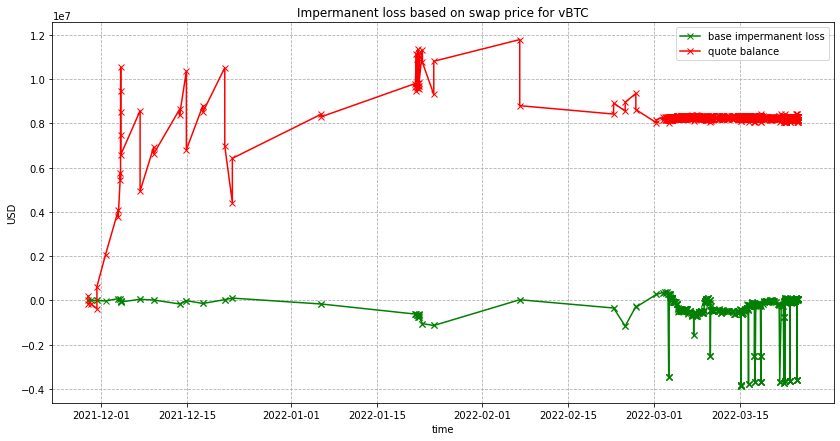

In [107]:
maker_pool_liquidity = get_and_show_impermanent_loss(trading_df=master_trader_df, liquidity_df=liquidity_changes_df, 
                                                     maker="0x9c1e0c67aa30c063f341885b12cb81cc94613fc7",
                                                     token="vBTC")

In [101]:
master_trader_df[master_trader_df["trader"] == "0xd3fab52a0c93346f23a9b9b24fd45ea0b8dd3420"]["pool_name"].unique()

array([nan, 'vFTM', 'vAVAX', 'vSOL', 'vNEAR', 'vMATIC', 'vAAVE', 'vAPE',
       'vATOM', 'vPERP', 'vETH', 'vCRV'], dtype=object)

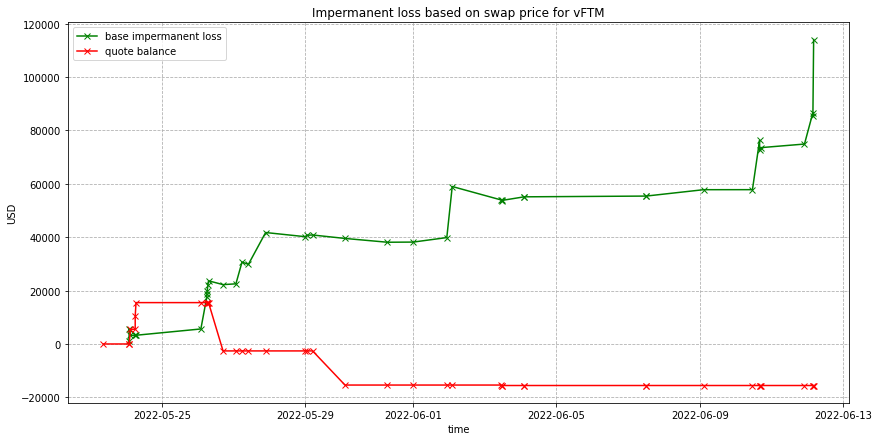

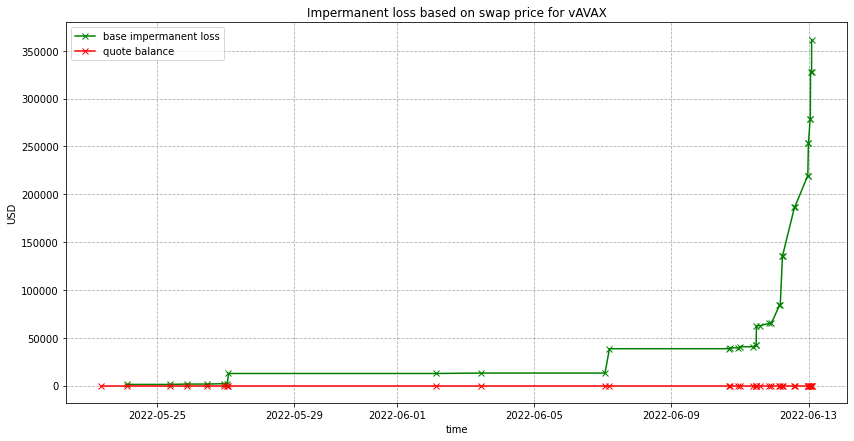

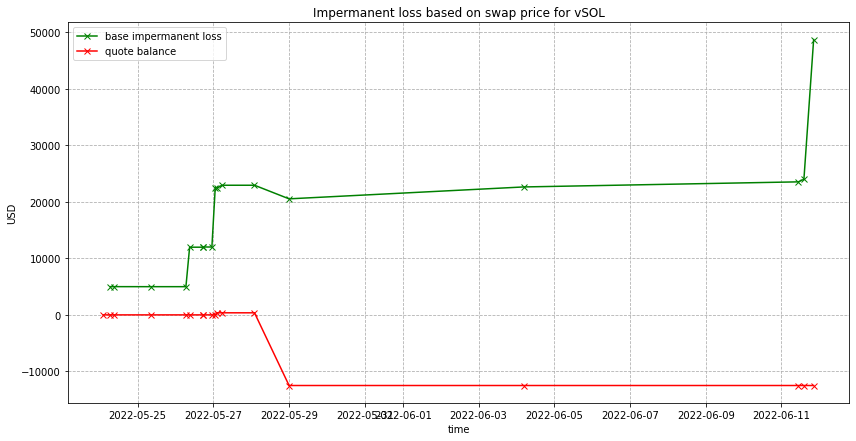

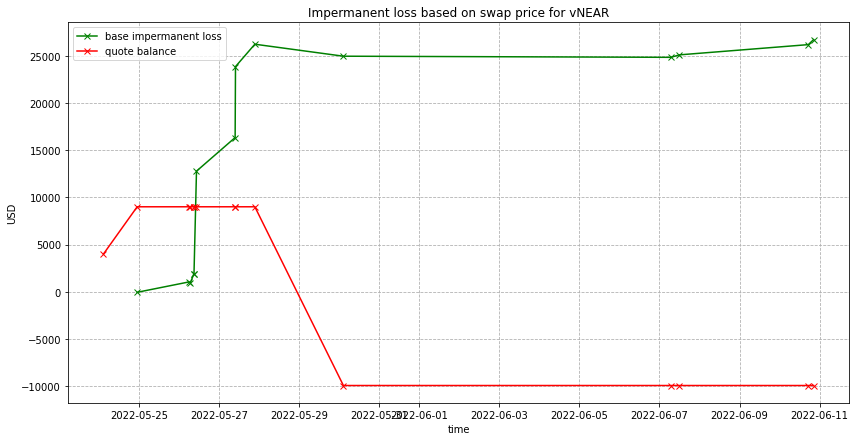

In [108]:
maker_pool_liquidity = get_and_show_impermanent_loss(trading_df=master_trader_df, liquidity_df=liquidity_changes_df, 
                                                     maker="0xd3fab52a0c93346f23a9b9b24fd45ea0b8dd3420",
                                                     token="vFTM")
maker_pool_liquidity = get_and_show_impermanent_loss(trading_df=master_trader_df, liquidity_df=liquidity_changes_df, 
                                                     maker="0xd3fab52a0c93346f23a9b9b24fd45ea0b8dd3420",
                                                     token="vAVAX")
maker_pool_liquidity = get_and_show_impermanent_loss(trading_df=master_trader_df, liquidity_df=liquidity_changes_df, 
                                                     maker="0xd3fab52a0c93346f23a9b9b24fd45ea0b8dd3420",
                                                     token="vSOL")
maker_pool_liquidity = get_and_show_impermanent_loss(trading_df=master_trader_df, liquidity_df=liquidity_changes_df, 
                                                     maker="0xd3fab52a0c93346f23a9b9b24fd45ea0b8dd3420",
                                                     token="vNEAR")

In [94]:
maker_pool_liquidity

,maker,time,base,quote,quote_fee,lower_bound,upper_bound,swapped_price,base_balance,prev_base_balance,prev_swapped_price,swapped_impermanent_loss,cumulative_swapped_impermanent_loss,quote_balance,prev_quote_balance,quote_impermanent_loss,cumulative_quote_impermanent_loss
0,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,2021-11-28 21:44:00,3.255201,2.000000e+05,0.000000,5.360810e+04,5.900932e+04,56249.389746,3.255201,NaN,NaN,NaN,NaN,2.000000e+05,NaN,NaN,NaN
1,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,2021-11-28 21:44:00,-0.741848,-3.565714e+05,761.152618,5.171263e+04,5.692287e+04,56249.389746,2.513352,3.255201,56249.389746,0.000000,0.000000,-1.565714e+05,2.000000e+05,-3.565714e+05,-3.565714e+05
2,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,2021-11-29 09:40:00,-0.000896,-5.140477e+01,0.006881,2.954278e-39,3.384921e+38,55821.168597,2.512457,2.513352,56249.389746,1076.270677,1076.270677,-1.566228e+05,-1.565714e+05,-5.140477e+01,-3.566228e+05
3,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,2021-11-30 08:41:00,-2.800218,-2.257253e+05,607.217814,5.360810e+04,5.900932e+04,56541.137090,-0.287761,2.512457,55821.168597,-1808.889693,-732.619017,-3.823481e+05,-1.566228e+05,-2.257253e+05,-5.823481e+05
4,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,2021-11-30 08:41:00,16.267975,1.000000e+06,0.000000,5.328743e+04,6.008105e+04,56541.137090,15.980214,-0.287761,56541.137090,-0.000000,-732.619017,6.176519e+05,-3.823481e+05,1.000000e+06,4.176519e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,2022-03-24 09:06:00,-0.001449,-6.235489e+01,0.000000,3.317260e+04,5.590748e+04,43077.671935,-174.790066,-174.788617,43077.671935,-0.000000,49871.261603,8.046691e+06,8.046753e+06,-6.235489e+01,7.846691e+06
868,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,2022-03-24 09:06:00,2.902825,1.249265e+05,0.000000,3.317260e+04,5.590748e+04,43077.671935,-171.887241,-174.790066,43077.671935,-0.000000,49871.261603,8.171617e+06,8.046691e+06,1.249265e+05,7.971617e+06
869,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,2022-03-24 09:37:00,2.838812,1.250000e+05,0.000000,3.297417e+04,5.590748e+04,43055.721185,-169.048429,-171.887241,43077.671935,-3773.053870,46098.207733,8.296617e+06,8.171617e+06,1.250000e+05,8.096617e+06
870,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,2022-03-24 09:37:00,-2.884910,-1.256986e+05,14.853304,3.317260e+04,5.590748e+04,43055.721185,-171.933339,-169.048429,43055.721185,-0.000000,46098.207733,8.170919e+06,8.296617e+06,-1.256986e+05,7.970919e+06


# Maximal drawdown

Formula of the maximal drawdown is created for finding out the maximal value by which the asset may drop down referring to the highest value of the asset for the specified period. Considering that there is a need to estimate a performance of each asset over time and how risky it is to perform trading on specific pool on this asset it is required to find it for monthly, daily and hourly basis. Estimation will be performed conform formula:

              P - L

**MDD(T) = ----------**;
            
                P

There will be used a master trading table to see distribution of the price. Considering that there are 3 prices available at each trading record it is required to find 3 lines

In [8]:
trading_prices_df = master_trader_df[master_trader_df["pool_name"] == "vBTC"][["time", "swapped_price", "entry_price_after", "market_price_after"]].dropna()
trading_prices_df

,time,swapped_price,entry_price_after,market_price_after
5,2021-11-27 08:19:00,54315.297418,54369.667085,54334.893904
8,2021-11-27 08:19:00,54354.490389,54389.276112,54374.093942
10,2021-11-27 08:19:00,54393.697496,54408.885139,54413.308117
12,2021-11-27 08:19:00,54432.918738,54428.494166,54452.536426
14,2021-11-27 08:19:00,54472.154115,54448.103193,54491.778871
...,...,...,...,...
7522641,2022-06-17 17:17:54,20678.290489,21450.414927,20695.846546
7522685,2022-06-17 17:21:04,20677.559633,20656.882074,20659.288879
7522689,2022-06-17 17:22:21,20646.157701,21204.194129,20633.034868
7522718,2022-06-17 17:26:21,20619.926338,21203.008588,20606.826135


Each cell will cover its type of resample and minimum with maximum values:

*   Hourly distribution of values;
*   Daily distribution of values;
*   Monthly distribution of values

In [9]:
max_hourly_trading_prices_df = trading_prices_df.resample("H", on="time").max()
max_hourly_trading_prices_df.drop(columns=["time"], inplace=True)
max_hourly_trading_prices_df.rename(columns={"swapped_price": "max_swap_price", 
                                             "entry_price_after": "max_entry_price_after", 
                                             "market_price_after": "max_market_price_after"}, 
                                    inplace=True)
min_hourly_trading_prices_df = trading_prices_df.resample("H", on="time").min()
min_hourly_trading_prices_df.drop(columns=["time"], inplace=True)
min_hourly_trading_prices_df.rename(columns={"swapped_price": "min_swap_price", 
                                             "entry_price_after": "min_entry_price_after", 
                                             "market_price_after": "min_market_price_after"}, 
                                    inplace=True)

hourly_trading_prices_df = pd.concat([max_hourly_trading_prices_df, min_hourly_trading_prices_df], axis=1, join='inner')
hourly_trading_prices_df["swap_max_drawdown"] = ((hourly_trading_prices_df["max_swap_price"] - hourly_trading_prices_df["min_swap_price"]) / 
                                                 hourly_trading_prices_df["max_swap_price"] * 100)
hourly_trading_prices_df["entry_price_max_drawdown"] = ((hourly_trading_prices_df["max_entry_price_after"] - hourly_trading_prices_df["min_entry_price_after"]) / 
                                                            hourly_trading_prices_df["max_entry_price_after"] * 100)
hourly_trading_prices_df["market_price_max_drawdown"] = ((hourly_trading_prices_df["max_market_price_after"] - hourly_trading_prices_df["min_market_price_after"]) / 
                                                            hourly_trading_prices_df["max_market_price_after"] * 100)

In [10]:
max_daily_trading_prices_df = trading_prices_df.resample("D", on="time").max()
max_daily_trading_prices_df.drop(columns=["time"], inplace=True)
max_daily_trading_prices_df.rename(columns={"swapped_price": "max_swap_price", 
                                             "entry_price_after": "max_entry_price_after", 
                                             "market_price_after": "max_market_price_after"}, 
                                    inplace=True)
min_daily_trading_prices_df = trading_prices_df.resample("D", on="time").min()
min_daily_trading_prices_df.drop(columns=["time"], inplace=True)
min_daily_trading_prices_df.rename(columns={"swapped_price": "min_swap_price", 
                                             "entry_price_after": "min_entry_price_after", 
                                             "market_price_after": "min_market_price_after"}, 
                                    inplace=True)

daily_trading_prices_df = pd.concat([max_daily_trading_prices_df, min_daily_trading_prices_df], axis=1, join='inner')
daily_trading_prices_df["swap_max_drawdown"] = ((daily_trading_prices_df["max_swap_price"] - daily_trading_prices_df["min_swap_price"]) / 
                                                 daily_trading_prices_df["max_swap_price"] * 100)
daily_trading_prices_df["entry_price_max_drawdown"] = ((daily_trading_prices_df["max_entry_price_after"] - daily_trading_prices_df["min_entry_price_after"]) / 
                                                            daily_trading_prices_df["max_entry_price_after"] * 100)
daily_trading_prices_df["market_price_max_drawdown"] = ((daily_trading_prices_df["max_market_price_after"] - daily_trading_prices_df["min_market_price_after"]) / 
                                                            daily_trading_prices_df["max_market_price_after"] * 100)

In [11]:
max_monthly_trading_prices_df = trading_prices_df.resample("M", on="time").max()
max_monthly_trading_prices_df.drop(columns=["time"], inplace=True)
max_monthly_trading_prices_df.rename(columns={"swapped_price": "max_swap_price", 
                                             "entry_price_after": "max_entry_price_after", 
                                             "market_price_after": "max_market_price_after"}, 
                                    inplace=True)
min_monthly_trading_prices_df = trading_prices_df.resample("M", on="time").min()
min_monthly_trading_prices_df.drop(columns=["time"], inplace=True)
min_monthly_trading_prices_df.rename(columns={"swapped_price": "min_swap_price", 
                                             "entry_price_after": "min_entry_price_after", 
                                             "market_price_after": "min_market_price_after"}, 
                                    inplace=True)

monthly_trading_prices_df = pd.concat([max_monthly_trading_prices_df, min_monthly_trading_prices_df], axis=1, join='inner')
monthly_trading_prices_df["swap_max_drawdown"] = ((monthly_trading_prices_df["max_swap_price"] - monthly_trading_prices_df["min_swap_price"]) / 
                                                 monthly_trading_prices_df["max_swap_price"] * 100)
monthly_trading_prices_df["entry_price_max_drawdown"] = ((monthly_trading_prices_df["max_entry_price_after"] - monthly_trading_prices_df["min_entry_price_after"]) / 
                                                            monthly_trading_prices_df["max_entry_price_after"] * 100)
monthly_trading_prices_df["market_price_max_drawdown"] = ((monthly_trading_prices_df["max_market_price_after"] - monthly_trading_prices_df["min_market_price_after"]) / 
                                                            monthly_trading_prices_df["max_market_price_after"] * 100)

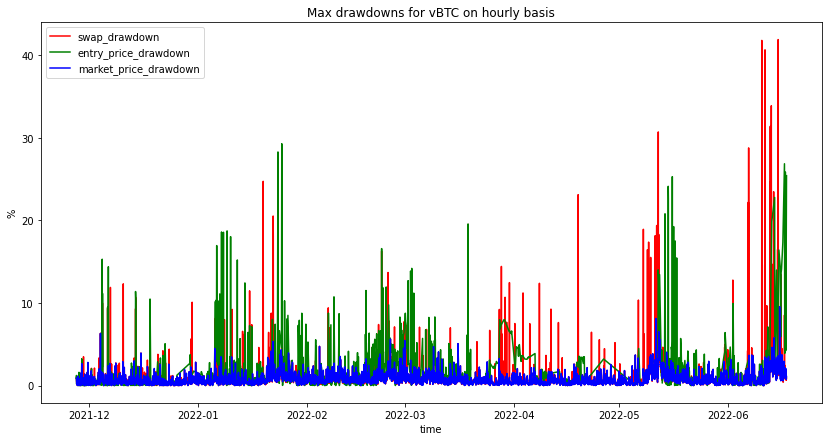

In [12]:
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(hourly_trading_prices_df[hourly_trading_prices_df["swap_max_drawdown"] < 99].index, 
        hourly_trading_prices_df[hourly_trading_prices_df["swap_max_drawdown"] < 99]["swap_max_drawdown"], 
        color='r', label='swap_drawdown')
ax.plot(hourly_trading_prices_df[hourly_trading_prices_df["entry_price_max_drawdown"] < 99].index, 
        hourly_trading_prices_df[hourly_trading_prices_df["entry_price_max_drawdown"] < 99]["entry_price_max_drawdown"], 
        color='g', label='entry_price_drawdown')
ax.plot(hourly_trading_prices_df[hourly_trading_prices_df["market_price_max_drawdown"] < 99].index, 
        hourly_trading_prices_df[hourly_trading_prices_df["market_price_max_drawdown"] < 99]["market_price_max_drawdown"], 
        color='b', label='market_price_drawdown')
ax.set_xlabel("time")
ax.set_ylabel("%")
ax.set_title("Max drawdowns for vBTC on hourly basis")
ax.legend()
plt.show()

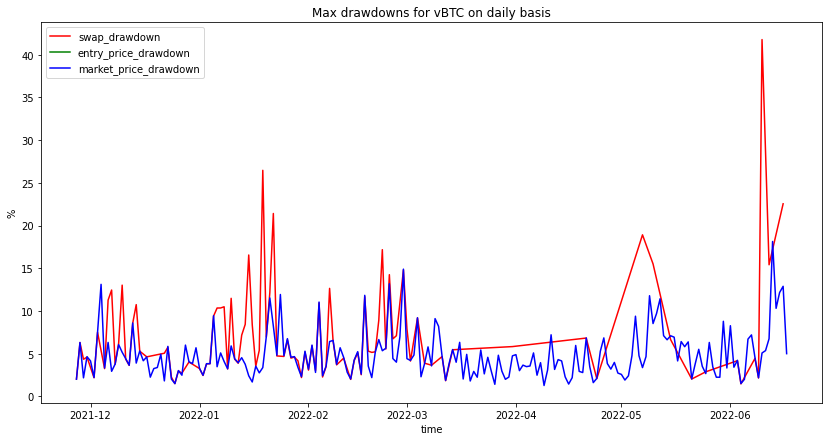

In [13]:
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(daily_trading_prices_df[daily_trading_prices_df["swap_max_drawdown"] < 99].index, 
        daily_trading_prices_df[daily_trading_prices_df["swap_max_drawdown"] < 99]["swap_max_drawdown"], 
        color='r', label='swap_drawdown')
ax.plot(daily_trading_prices_df[daily_trading_prices_df["entry_price_max_drawdown"] < 99].index, 
        daily_trading_prices_df[daily_trading_prices_df["entry_price_max_drawdown"] < 99]["entry_price_max_drawdown"], 
        color='g', label='entry_price_drawdown')
ax.plot(daily_trading_prices_df[daily_trading_prices_df["market_price_max_drawdown"] < 99].index, 
        daily_trading_prices_df[daily_trading_prices_df["market_price_max_drawdown"] < 99]["market_price_max_drawdown"], 
        color='b', label='market_price_drawdown')
ax.set_xlabel("time")
ax.set_ylabel("%")
ax.set_title("Max drawdowns for vBTC on daily basis")
ax.legend()
plt.show()

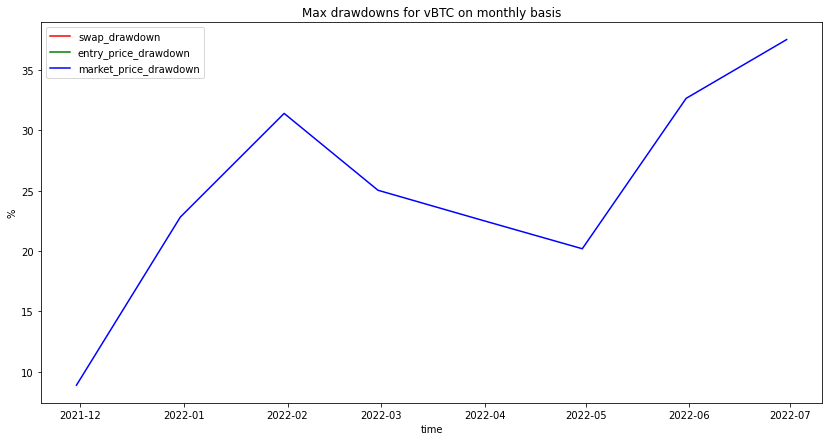

In [14]:
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(monthly_trading_prices_df[monthly_trading_prices_df["swap_max_drawdown"] < 99].index, 
        monthly_trading_prices_df[monthly_trading_prices_df["swap_max_drawdown"] < 99]["swap_max_drawdown"], 
        color='r', label='swap_drawdown')
ax.plot(monthly_trading_prices_df[monthly_trading_prices_df["entry_price_max_drawdown"] < 99].index, 
        monthly_trading_prices_df[monthly_trading_prices_df["entry_price_max_drawdown"] < 99]["entry_price_max_drawdown"], 
        color='g', label='entry_price_drawdown')
ax.plot(monthly_trading_prices_df[monthly_trading_prices_df["market_price_max_drawdown"] < 99].index, 
        monthly_trading_prices_df[monthly_trading_prices_df["market_price_max_drawdown"] < 99]["market_price_max_drawdown"], 
        color='b', label='market_price_drawdown')
ax.set_xlabel("time")
ax.set_ylabel("%")
ax.set_title("Max drawdowns for vBTC on monthly basis")
ax.legend()
plt.show()

## Making a function for process automatization

It is required to automatize extraction of the drawdowns and their visualizations

In [15]:
def max_drawdowns_extraction(trading_df: pd.DataFrame, token: str,
                             mode: str="hourly") -> pd.DataFrame:
        """get max drawdowns dataframe conform specified resolution

        Args:
            trading_df (pd.DataFrame): dataframe with trading prices
            token (str): token for which drawdowns will be found
            mode (str, optional): drawdown resolution. Defaults to "hourly".

        Returns:
            pd.DataFrame: dataframe with drawdowns
        """
        
        # set resolution depending on the chosen mode
        if mode == "hourly":
                resolution = 'H'
        elif mode == 'daily':
                resolution = 'D'
        elif mode == 'monthly':
                resolution = 'M'
        else:
                raise(ValueError("Unknown mode, choose one of the hourly, daily or monthly"))
        
        # ignore unnecessary columns and remove gaps
        trading_prices_df = trading_df[trading_df["pool_name"] == token][
                ["time", "swapped_price", "entry_price_after", "market_price_after"]].dropna()
        
        # find resolution based (hourly, daily, monthly) max and min values
        max_resolution_trading_prices_df = trading_prices_df.resample(resolution, on="time").max()
        max_resolution_trading_prices_df.drop(columns=["time"], inplace=True)
        max_resolution_trading_prices_df.rename(columns={"swapped_price": "max_swap_price", 
                                                "entry_price_after": "max_entry_price_after", 
                                                "market_price_after": "max_market_price_after"}, 
                                        inplace=True)
        min_resolution_trading_prices_df = trading_prices_df.resample("H", on="time").min()
        min_resolution_trading_prices_df.drop(columns=["time"], inplace=True)
        min_resolution_trading_prices_df.rename(columns={"swapped_price": "min_swap_price", 
                                                "entry_price_after": "min_entry_price_after", 
                                                "market_price_after": "min_market_price_after"}, 
                                        inplace=True)

        # concat them and then find drawdown values for each price type
        resolution_trading_prices_df = pd.concat([max_resolution_trading_prices_df, min_resolution_trading_prices_df], axis=1, join='inner')
        resolution_trading_prices_df["swap_max_drawdown"] = (
                (resolution_trading_prices_df["max_swap_price"] - resolution_trading_prices_df["min_swap_price"]) / 
                                                                resolution_trading_prices_df["max_swap_price"] * 100)
        resolution_trading_prices_df["entry_price_max_drawdown"] = (
                (resolution_trading_prices_df["max_entry_price_after"] - resolution_trading_prices_df["min_entry_price_after"]) / 
                                                                resolution_trading_prices_df["max_entry_price_after"] * 100)
        resolution_trading_prices_df["market_price_max_drawdown"] = (
                (resolution_trading_prices_df["max_market_price_after"] - resolution_trading_prices_df["min_market_price_after"]) / 
                                                                resolution_trading_prices_df["max_market_price_after"] * 100)
        
        return resolution_trading_prices_df

In [16]:
def visualize_drawdowns(drawdowns_df: pd.DataFrame, token: str, separate_plots: bool=False, 
                        threshold: int=99, xsize: int=14, ysize: int=7):
    """visualize all drawdowns

    Args:
        drawdowns_df (pd.DataFrame): dataframe of drawdowns
        token (str): token for which drawdowns were found
        separate_plots (bool, optional): is it required to separate plots. Defaults to False.
        threshold (int, optional): threshold for filtering values. Defaults to 99.
        xsize (int, optional): horizontal size of plot. Defaults to 14.
        ysize (int, optional): vertical size of plot. Defaults to 7.
    """
    
    if not separate_plots:
        fig, ax = plt.subplots(figsize=(xsize, ysize))

        ax.plot(drawdowns_df[drawdowns_df["swap_max_drawdown"] < threshold].index, 
                drawdowns_df[drawdowns_df["swap_max_drawdown"] < threshold]["swap_max_drawdown"], 
                color='r', label='swap_drawdown')
        ax.plot(drawdowns_df[drawdowns_df["entry_price_max_drawdown"] < threshold].index, 
                drawdowns_df[drawdowns_df["entry_price_max_drawdown"] < threshold]["entry_price_max_drawdown"], 
                color='g', label='entry_price_drawdown')
        ax.plot(drawdowns_df[drawdowns_df["market_price_max_drawdown"] < threshold].index, 
                drawdowns_df[drawdowns_df["market_price_max_drawdown"] < threshold]["market_price_max_drawdown"], 
                color='b', label='market_price_drawdown')
        ax.set_xlabel("time")
        ax.set_ylabel("%")
        ax.set_title("Max drawdowns for " + token)
        ax.grid(True, linestyle='--')
        ax.legend()
        plt.show()
        
    else:
        fig = plt.figure(figsize=(xsize, ysize))
        
        ax = fig.add_subplot(1, 3, 1)
        ax.plot(drawdowns_df[drawdowns_df["swap_max_drawdown"] < threshold].index, 
                drawdowns_df[drawdowns_df["swap_max_drawdown"] < threshold]["swap_max_drawdown"], 
                color='r', label='swap_drawdown')
        ax.set_ylabel("%")
        ax.set_title("Max drawdowns for swap price of " + token)
        ax.grid(True, linestyle='--')
        
        ax = fig.add_subplot(1, 3, 2)
        ax.plot(drawdowns_df[drawdowns_df["entry_price_max_drawdown"] < threshold].index, 
                drawdowns_df[drawdowns_df["entry_price_max_drawdown"] < threshold]["entry_price_max_drawdown"], 
                color='g', label='entry_price_drawdown')
        ax.set_ylabel("%")
        ax.set_title("Max drawdowns for entry price of " + token)
        ax.grid(True, linestyle='--')
        
        ax = fig.add_subplot(1, 3, 3)
        ax.plot(drawdowns_df[drawdowns_df["market_price_max_drawdown"] < threshold].index, 
                drawdowns_df[drawdowns_df["market_price_max_drawdown"] < threshold]["market_price_max_drawdown"], 
                color='b', label='market_price_drawdown')
        ax.set_ylabel("%")
        ax.set_title("Max drawdowns for market price of " + token)
        ax.grid(True, linestyle='--')

        fig.tight_layout()        
        plt.show()

In [17]:
hourly_eth_drawdown_df = max_drawdowns_extraction(trading_df=master_trader_df, token='vETH', mode="hourly")
hourly_eth_drawdown_df

,max_swap_price,max_entry_price_after,max_market_price_after,min_swap_price,min_entry_price_after,min_market_price_after,swap_max_drawdown,entry_price_max_drawdown,market_price_max_drawdown
time,,,,,,,,,
2021-11-27 08:00:00,4144.673960,4129.641524,4146.270800,4106.445744,4110.556300,4108.035203,0.922346,0.462152,0.922168
2021-11-27 09:00:00,4168.324506,4172.455719,4170.544836,4143.684136,4130.149859,4141.558758,0.591134,1.013932,0.695019
2021-11-27 10:00:00,4140.902084,4138.748732,4140.245514,4111.041078,0.000000,4110.305914,0.721123,100.000000,0.723136
2021-11-27 11:00:00,4145.688078,4149.519099,4147.890345,4119.728373,0.000000,4120.469689,0.626186,100.000000,0.661075
2021-11-27 12:00:00,4157.246004,4158.997211,4157.556747,4125.363289,0.000000,4125.310121,0.766919,100.000000,0.775615
...,...,...,...,...,...,...,...,...,...
2022-06-17 13:00:00,1101.114905,1210.624308,1101.271417,1073.266723,0.000000,1072.998458,2.529090,100.000000,2.567302
2022-06-17 14:00:00,1095.312612,1660.515132,1095.182358,1066.088439,0.000000,1066.039001,2.668112,100.000000,2.661051
2022-06-17 15:00:00,1087.235223,1593.890179,1087.511865,1074.344962,0.000000,1074.215142,1.185600,100.000000,1.222674


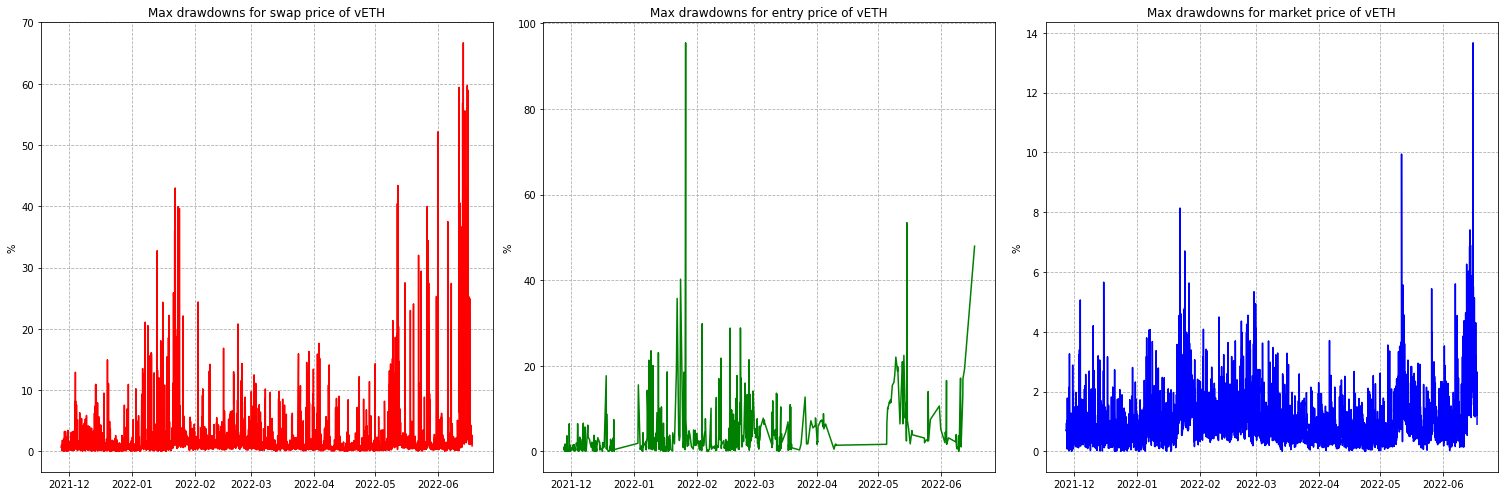

In [18]:
visualize_drawdowns(hourly_eth_drawdown_df, "vETH", separate_plots=True, xsize=21, ysize=7)

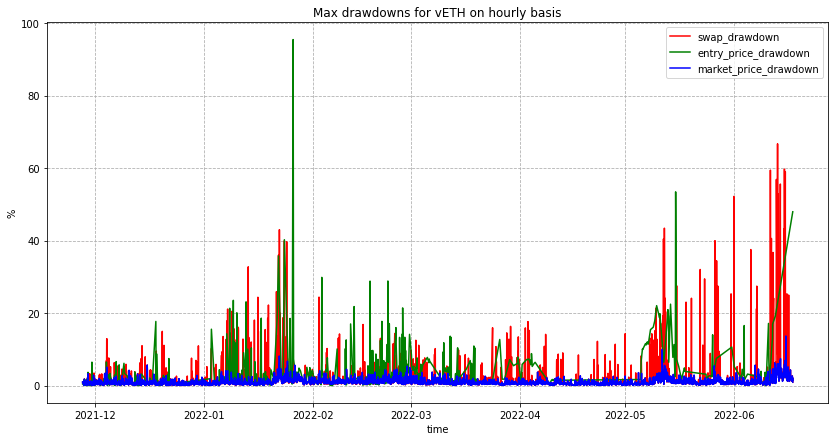

In [19]:
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(hourly_eth_drawdown_df[hourly_eth_drawdown_df["swap_max_drawdown"] < 99].index, 
        hourly_eth_drawdown_df[hourly_eth_drawdown_df["swap_max_drawdown"] < 99]["swap_max_drawdown"], 
        color='r', label='swap_drawdown')
ax.plot(hourly_eth_drawdown_df[hourly_eth_drawdown_df["entry_price_max_drawdown"] < 99].index, 
        hourly_eth_drawdown_df[hourly_eth_drawdown_df["entry_price_max_drawdown"] < 99]["entry_price_max_drawdown"], 
        color='g', label='entry_price_drawdown')
ax.plot(hourly_eth_drawdown_df[hourly_eth_drawdown_df["market_price_max_drawdown"] < 99].index, 
        hourly_eth_drawdown_df[hourly_eth_drawdown_df["market_price_max_drawdown"] < 99]["market_price_max_drawdown"], 
        color='b', label='market_price_drawdown')
ax.set_xlabel("time")
ax.set_ylabel("%")
ax.set_title("Max drawdowns for vETH on hourly basis")
ax.grid(True, linestyle='--')
ax.legend()
plt.show()

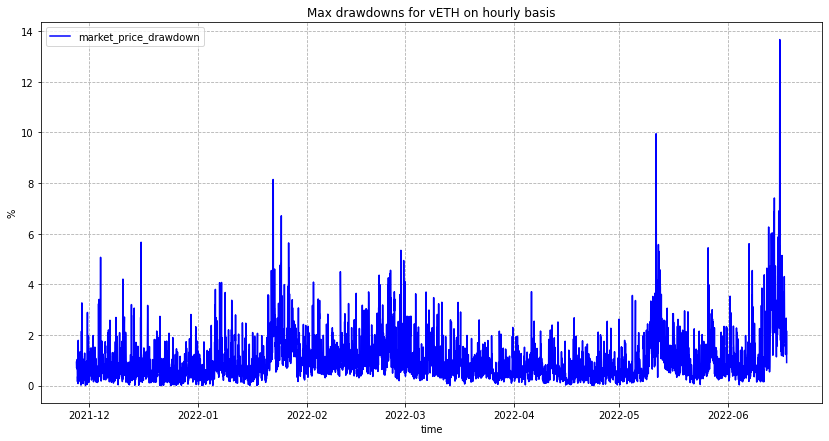

In [20]:
fig, ax = plt.subplots(figsize=(14, 7))

# ax.plot(hourly_eth_drawdown_df[hourly_eth_drawdown_df["swap_max_drawdown"] < 99].index, 
#         hourly_eth_drawdown_df[hourly_eth_drawdown_df["swap_max_drawdown"] < 99]["swap_max_drawdown"], 
#         color='r', label='swap_drawdown')
# ax.plot(hourly_eth_drawdown_df[hourly_eth_drawdown_df["entry_price_max_drawdown"] < 99].index, 
#         hourly_eth_drawdown_df[hourly_eth_drawdown_df["entry_price_max_drawdown"] < 99]["entry_price_max_drawdown"], 
#         color='g', label='entry_price_drawdown')
ax.plot(hourly_eth_drawdown_df[hourly_eth_drawdown_df["market_price_max_drawdown"] < 99].index, 
        hourly_eth_drawdown_df[hourly_eth_drawdown_df["market_price_max_drawdown"] < 99]["market_price_max_drawdown"], 
        color='b', label='market_price_drawdown')
ax.set_xlabel("time")
ax.set_ylabel("%")
ax.set_title("Max drawdowns for vETH on hourly basis")
ax.grid(True, linestyle='--')
ax.legend()
plt.show()

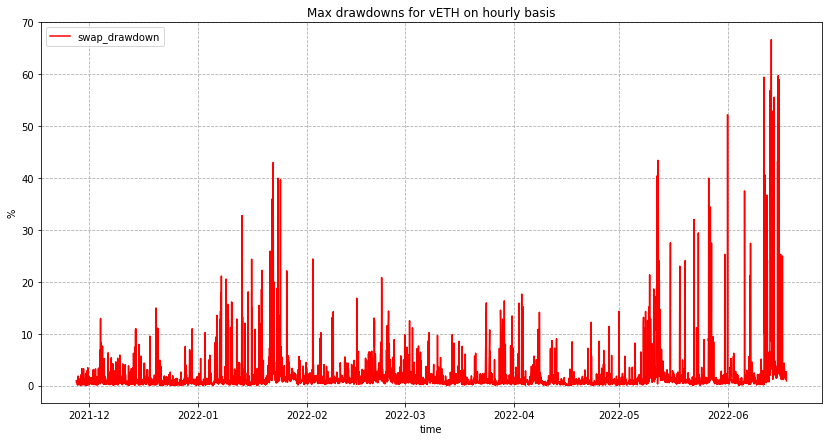

In [21]:
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(hourly_eth_drawdown_df[hourly_eth_drawdown_df["swap_max_drawdown"] < 99].index, 
        hourly_eth_drawdown_df[hourly_eth_drawdown_df["swap_max_drawdown"] < 99]["swap_max_drawdown"], 
        color='r', label='swap_drawdown')
# ax.plot(hourly_eth_drawdown_df[hourly_eth_drawdown_df["entry_price_max_drawdown"] < 99].index, 
#         hourly_eth_drawdown_df[hourly_eth_drawdown_df["entry_price_max_drawdown"] < 99]["entry_price_max_drawdown"], 
#         color='g', label='entry_price_drawdown')
# ax.plot(hourly_eth_drawdown_df[hourly_eth_drawdown_df["market_price_max_drawdown"] < 99].index, 
#         hourly_eth_drawdown_df[hourly_eth_drawdown_df["market_price_max_drawdown"] < 99]["market_price_max_drawdown"], 
#         color='b', label='market_price_drawdown')
ax.set_xlabel("time")
ax.set_ylabel("%")
ax.set_title("Max drawdowns for vETH on hourly basis")
ax.grid(True, linestyle='--')
ax.legend()
plt.show()

# Trying to solve strange behavior of the trader balance

There is a need to find a balance of money available at moment of time for trader and conform logical expectations there can't be situations with trader's balance going to negative values. So, there are two options that should be considered:

1. There is additional factor influencing the funds (at the writing time are considered deposits/withdraws, profits/losses and funding payments);
2. Cases when trader goes to a big minus are covered in the bad debt section or something similar.

In [50]:
def money_at_time_trader(trader_activity_df: pd.DataFrame, address: str,
                         xsize: int=25, ysize: int=12.5):
    """generate plot with money movement and balance

    Args:
        trader_activity_df (pd.DataFrame): overall trading activity df
        address (str): address of the trader for which activity is analyzed
        xsize (int, optional): length of chart. Defaults to 25.
        ysize (int, optional): height of chart. Defaults to 12.5.
    """
    #   set information only for one specific trader
    trader_df = trader_activity_df[trader_activity_df["trader"] == address][["trader", "time", "deposit", "withdraw", "realized_pnl", "funding_payment"]]
    trader_df.fillna(0, inplace=True)   #   make sure there are no gaps, because it may cause errors
    trader_df["money_movement"] = (trader_df["deposit"] - trader_df["withdraw"] + 
                                   trader_df["realized_pnl"] + trader_df["funding_payment"])
    trader_df["money_balance"] = trader_df["money_movement"].cumsum()
    
    #   plotting money movement and balance
    fig, ax = plt.subplots(figsize=(xsize, ysize))
    ax.bar(trader_df[trader_df["money_movement"] >= 0]["time"], 
        trader_df[trader_df["money_movement"] >= 0]["money_movement"],
        color='g', label='positive money movement')
    ax.bar(trader_df[trader_df["money_movement"] < 0]["time"], 
        trader_df[trader_df["money_movement"] < 0]["money_movement"],
        color='r', label='negative money movement')
    ax.plot(trader_df["time"], trader_df["money_balance"],
        color='b', label='money balance')
    ax.set_xlabel("time")
    ax.set_ylabel("USD")
    ax.legend()
    ax.grid(True, linestyle='--')
    ax.set_title("Money flow for " + address)
    plt.show()

In [33]:
funding_payment_df = pd.read_csv("funding_payments.csv")
funding_payment_df.drop(columns=["Unnamed: 0", "id"])

,tx_hash,base_token,funding_payment,block_number_log_index,block_number,timestamp,time
0,0x9a9ef69c82d19bde6a2794c5de22bbb02dd3b2b4f048...,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.000000,515560002,515560,1638001140,2021-11-27 08:19:00
1,0x9e2a266e4bb63ea7baaa53522ed51d7dc414df095e07...,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.000000,515624002,515624,1638001245,2021-11-27 08:20:45
2,0x79655d30e251fa6cd88d1bdeb0a3bc11d2316b6dd5ff...,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.000000,515740002,515740,1638001497,2021-11-27 08:24:57
3,0x6cf3b7acabc36423f5c80006028ef5144c006fecfb36...,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0.000000,516486001,516486,1638003992,2021-11-27 09:06:32
4,0x1f9cbc33e7ba0bb63fe8431c7356c19e2a8529a8277b...,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0.021516,516538002,516538,1638004141,2021-11-27 09:09:01
...,...,...,...,...,...,...,...
2346915,0x2ad772a2702c694c7e07f598877d5cbceabc2c4d0f34...,0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb,0.061829,12061841002,12061841,1655402426,2022-06-16 18:00:26
2346916,0x1f7d56c26682028bb931df302fb5b0a66f9fc6af079b...,0x3fb3282e3ba34a0bff94845f1800eb93cc6850d4,5.211893,12061856002,12061856,1655402442,2022-06-16 18:00:42
2346917,0x77891843790367fc904040d2ed027e091431e3e6501b...,0x9482aafdced6b899626f465e1fa0cf1b1418d797,1.453814,12061852002,12061852,1655402442,2022-06-16 18:00:42
2346918,0xed6fb6aacf469dab951adf3508b5b1c1303d6ef6fcd4...,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,-65.119290,12061868002,12061868,1655402457,2022-06-16 18:00:57


In [38]:
funding_payment_df.loc[2346915].tx_hash

'0x2ad772a2702c694c7e07f598877d5cbceabc2c4d0f34eda56ec5a5b99acb5e02'

In [39]:
funding_payment_df["funding_payment"].sum()

-291417.9651316484

In [40]:
funding_payment_df[funding_payment_df["funding_payment"] > 0]["funding_payment"].sum()

1165442.4013993398

In [41]:
funding_payment_df[funding_payment_df["funding_payment"] < 0]["funding_payment"].sum()

-1456860.3665309884

Conform the information that can be seen on the chart below drop of the balance is much bigger compared even to the entire sum of funding payments, meaning that it is not covering the drop. Bad debts are not covering those drops (because there are no bad debts registered in the system)

# Check of different addresses

In [52]:
master_trader_df.tail(20)

,trader,exchanged_position_size,exchanged_position_notional,fee,open_notional,realized_pnl,position_size_after,swapped_price,entry_price_after,market_price_after,...,mark_twap,index_twap,daily_funding_rate,deposit,withdraw,liquidator,liquidation_fee,position_size_abs,position_notional_abs,block_number
7522787,0x91d46a68324991f2e96f121317b642a8d4179190,-0.000840,0.907243,0.000907,416119.689838,0.0,-384.453998,1079.728348,1082.365359,1079.728286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7522788,0xdab8a2e0b213ec8447d4f7cdb783d53ed3428b7a,-31840.000000,822.885743,0.822886,945.422893,0.0,-36640.000000,0.025844,0.025803,0.025812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7522789,0x3205dbab7b8d704ed05bc72234178d61058c10ca,-3.700000,3993.972466,3.993972,5309.805821,0.0,-4.920000,1079.452018,1079.228825,1079.175821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7522790,0xf77ca96962bc48d6ff7b10f35ef2f504a287b3a1,-32.008146,1008.556733,1.008557,10748.538029,0.0,-342.032246,31.509377,31.425511,31.470272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7522791,0x91d46a68324991f2e96f121317b642a8d4179190,-4.168168,4496.889857,4.496890,420612.082805,0.0,-388.622166,1078.864846,1082.316243,1078.553960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7522792,0x3478d1ba5bc6c0e662dec109c70c0065dad5f5be,-213.875422,300.300300,0.300300,239418.680269,0.0,-153602.303615,1.404090,1.558692,1.403425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7522793,0x0cbdd4a3861ba3b2e0f68cea10209a606d38aeca,-1.673996,1.031275,0.001031,73363.280870,0.0,-121564.896077,0.616056,0.603491,0.616055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7522794,0x25d2415b78bd1d5794934b6b2204b349c1cef7da,-0.036006,741.508049,0.741508,390154.602633,0.0,-18.401977,20593.738809,21201.776157,20580.659795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7522795,0x7462da033c5cceb21691d2447af34f3e333e0b85,-294.273237,1000.542104,1.000542,6106.222557,0.0,-1790.294000,3.400045,3.410737,3.394787,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7522796,0x428fa1c9894d21b12c64055a9f6be982b6794737,-155.762508,997.192456,0.997192,46219.210723,0.0,-7162.083005,6.402006,6.453320,6.392094,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


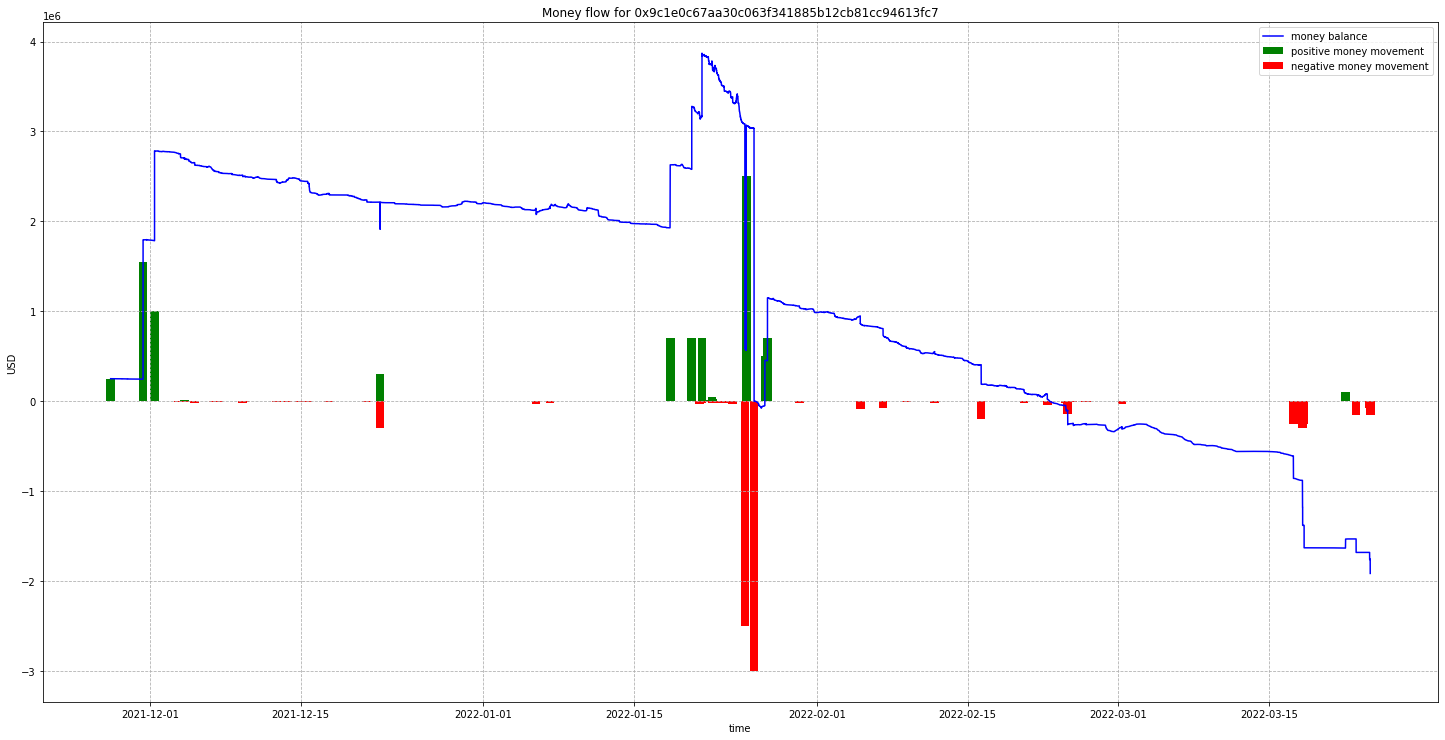

In [51]:
money_at_time_trader(master_trader_df, address="0x9c1e0c67aa30c063f341885b12cb81cc94613fc7")

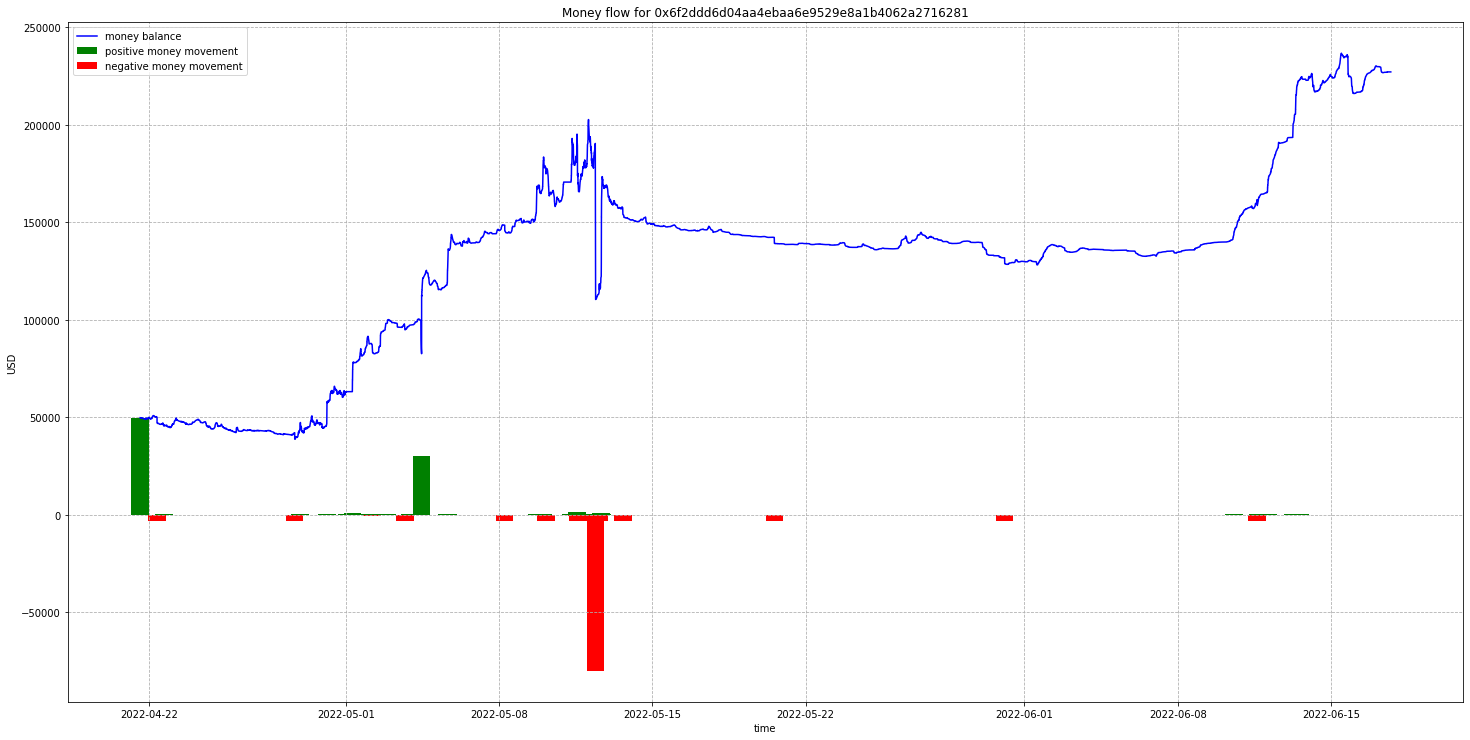

In [43]:
money_at_time_trader(master_trader_df, address="0x6f2ddd6d04aa4ebaa6e9529e8a1b4062a2716281")

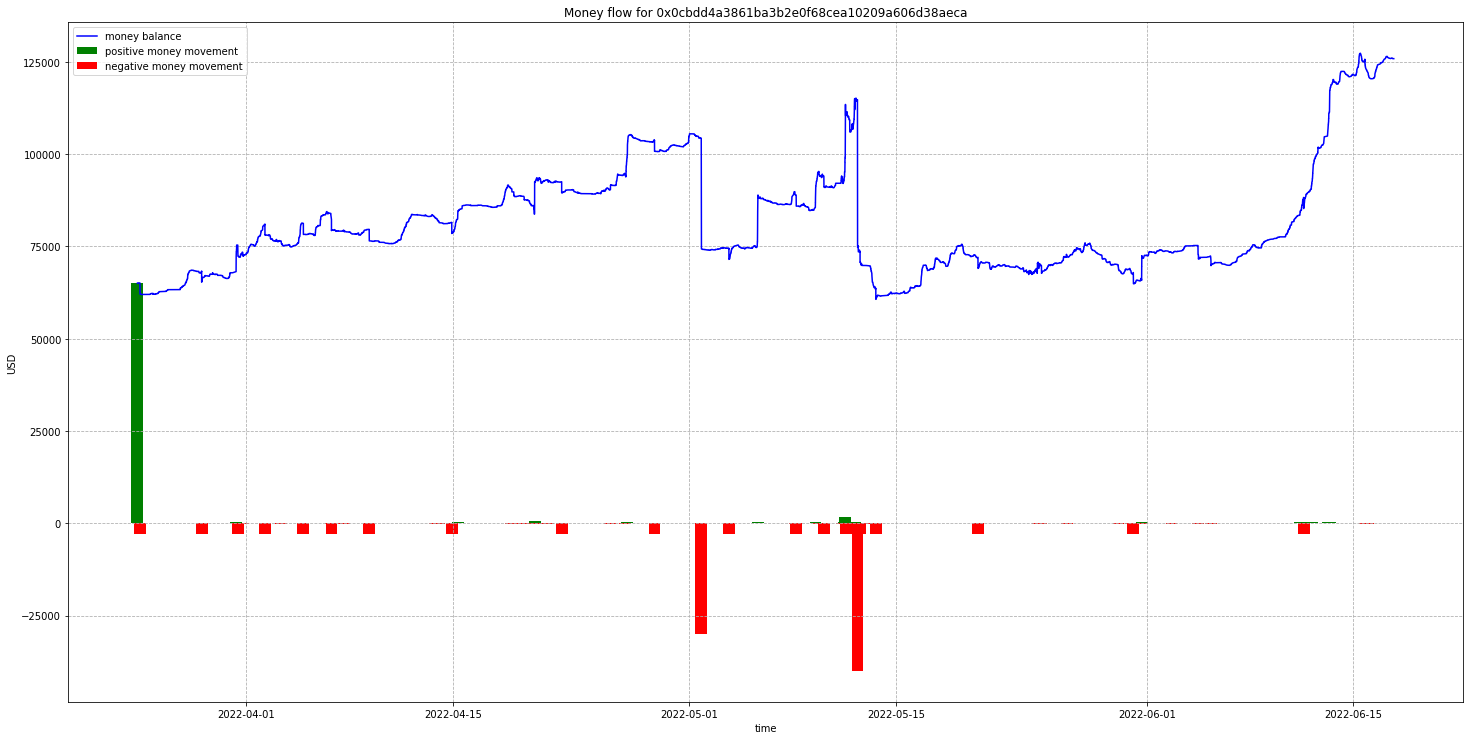

In [44]:
money_at_time_trader(master_trader_df, address="0x0cbdd4a3861ba3b2e0f68cea10209a606d38aeca")

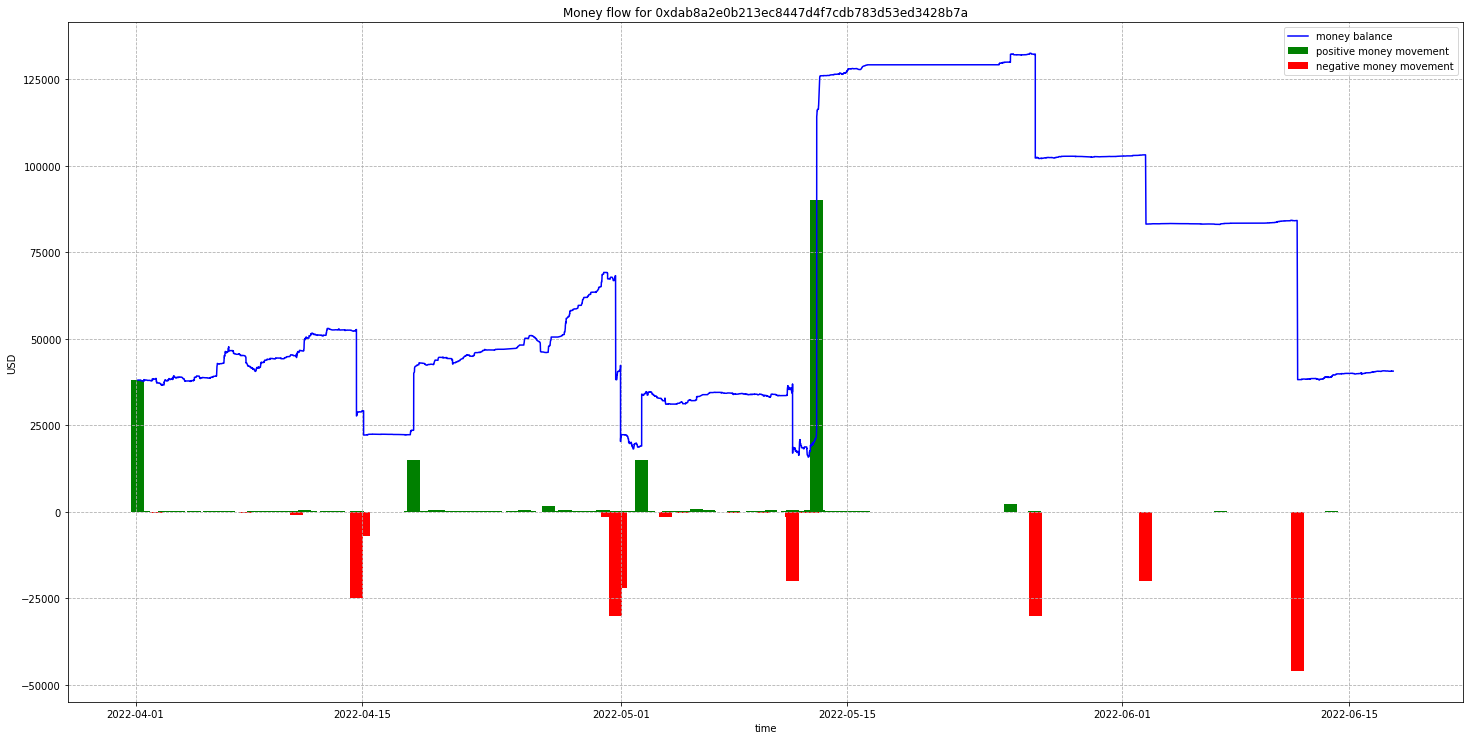

In [45]:
money_at_time_trader(master_trader_df, address="0xdab8a2e0b213ec8447d4f7cdb783d53ed3428b7a")

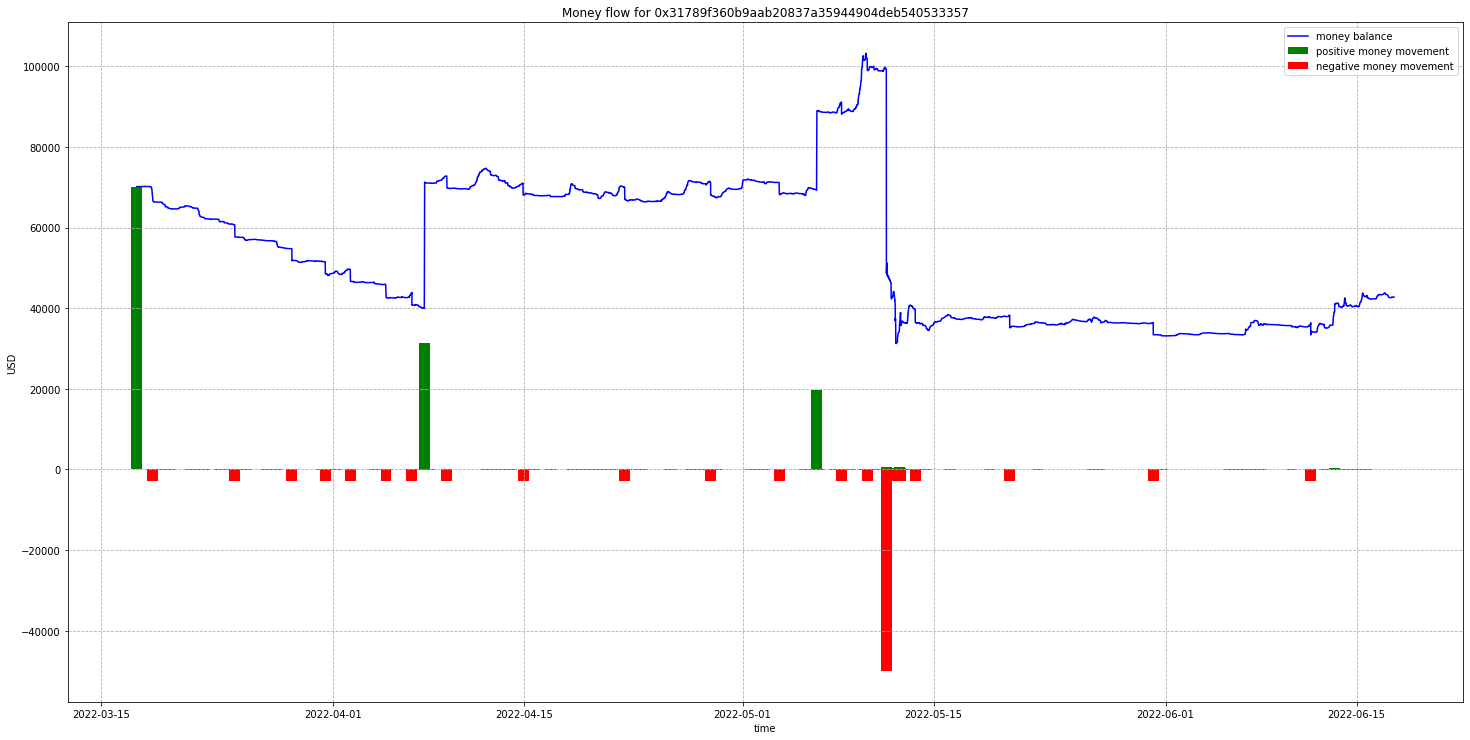

In [46]:
money_at_time_trader(master_trader_df, address="0x31789f360b9aab20837a35944904deb540533357")

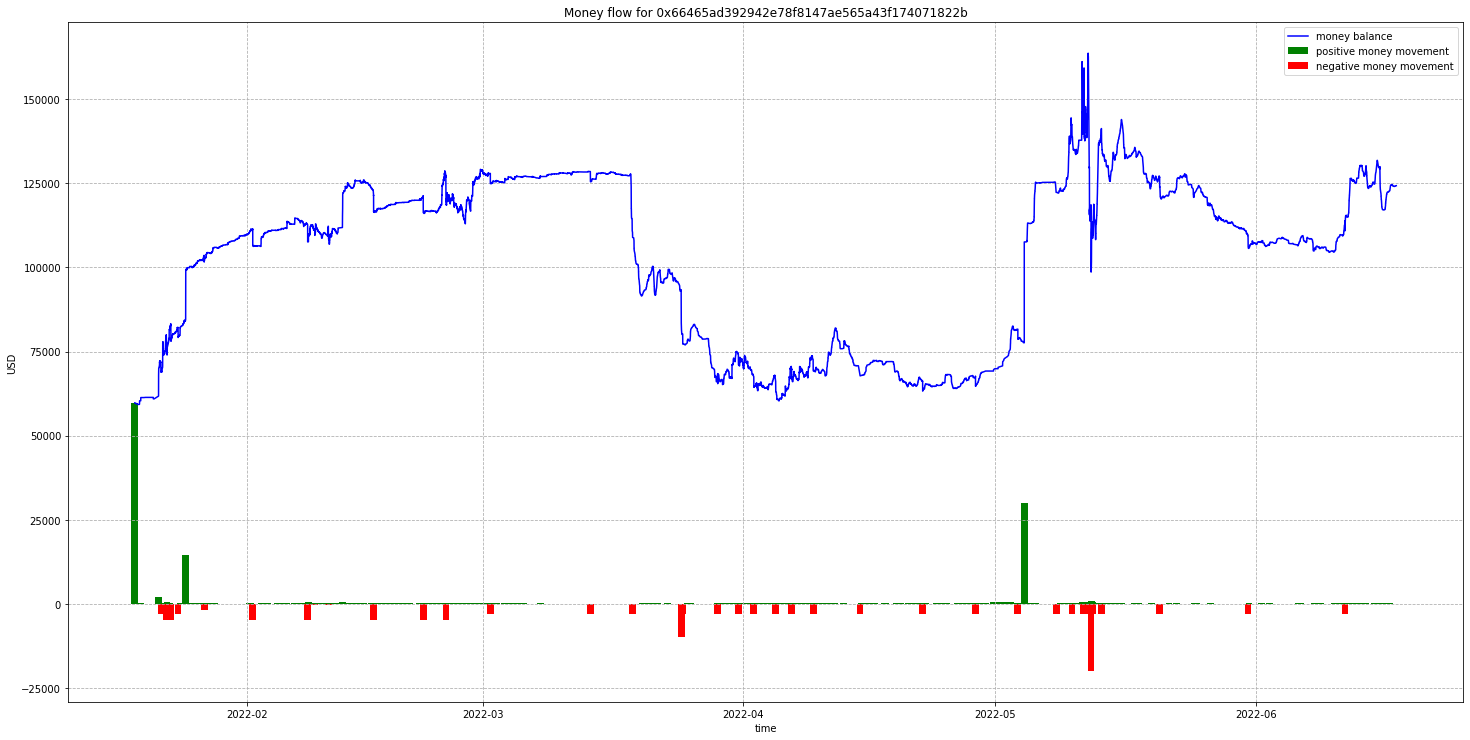

In [47]:
money_at_time_trader(master_trader_df, address="0x66465ad392942e78f8147ae565a43f174071822b")

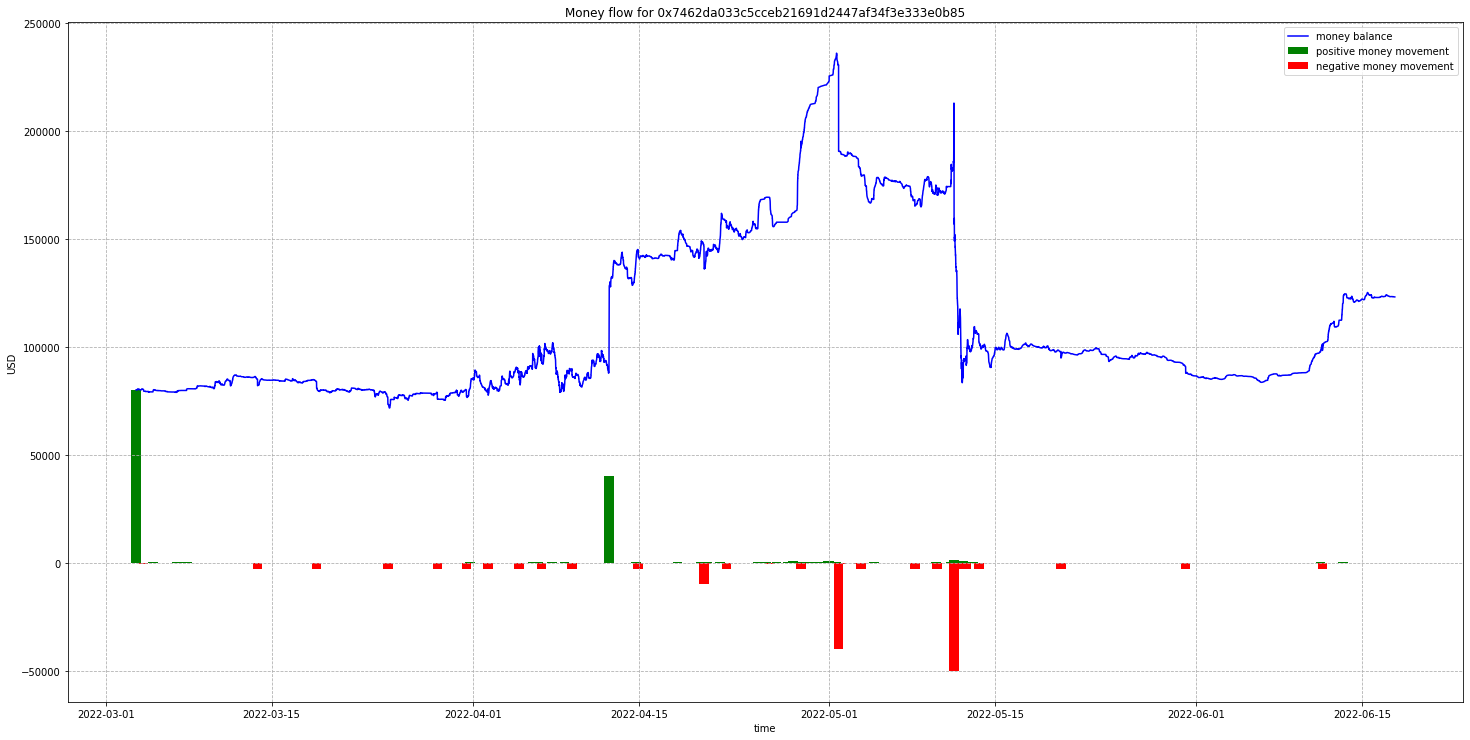

In [53]:
money_at_time_trader(master_trader_df, address="0x7462da033c5cceb21691d2447af34f3e333e0b85")

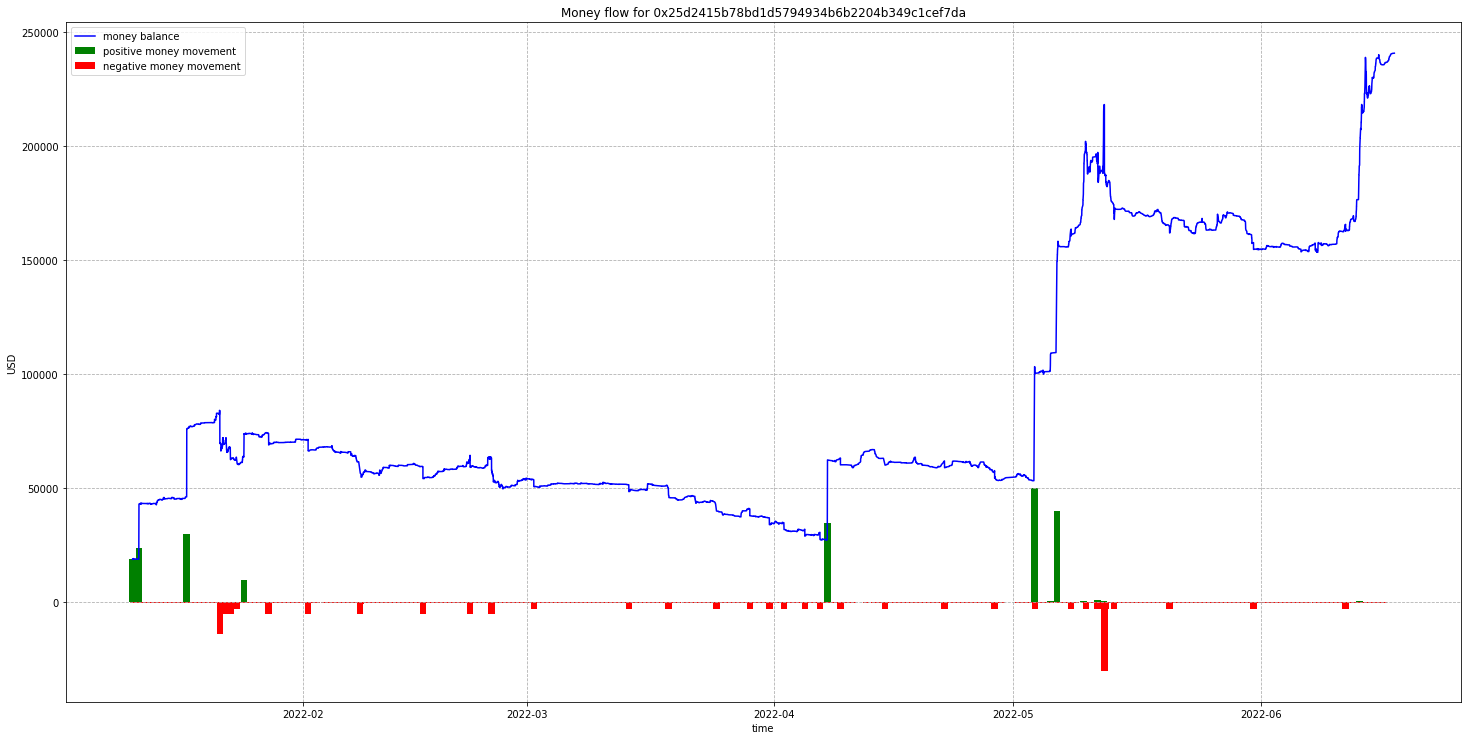

In [54]:
money_at_time_trader(master_trader_df, address="0x25d2415b78bd1d5794934b6b2204b349c1cef7da")

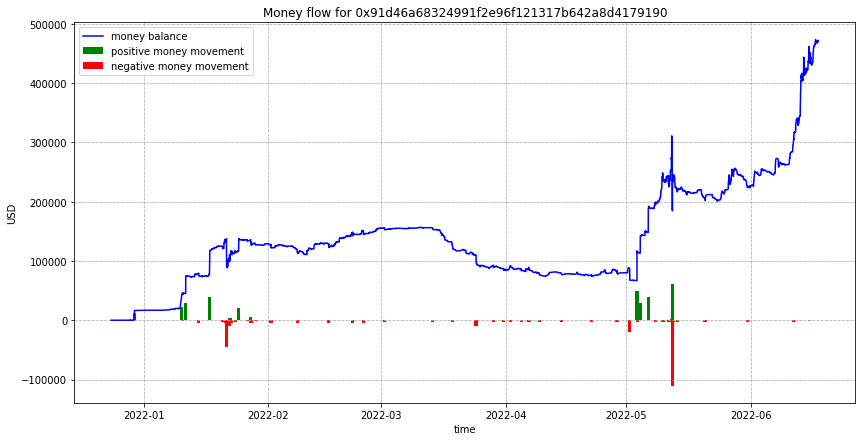

In [55]:
money_at_time_trader(master_trader_df, address="0x91d46a68324991f2e96f121317b642a8d4179190", xsize=14, ysize=7)

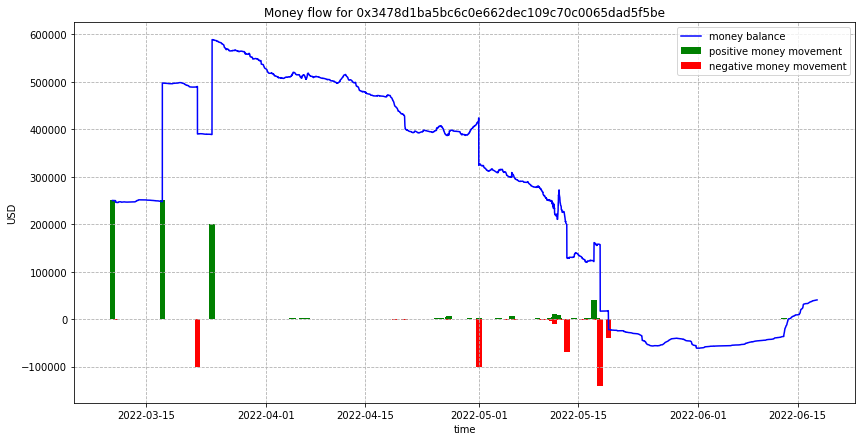

In [56]:
money_at_time_trader(master_trader_df, address="0x3478d1ba5bc6c0e662dec109c70c0065dad5f5be", xsize=14, ysize=7)

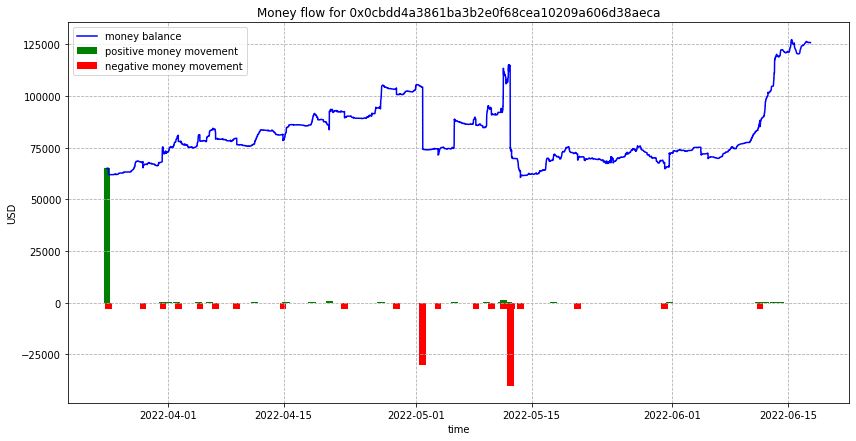

In [57]:
money_at_time_trader(master_trader_df, address="0x0cbdd4a3861ba3b2e0f68cea10209a606d38aeca", xsize=14, ysize=7)

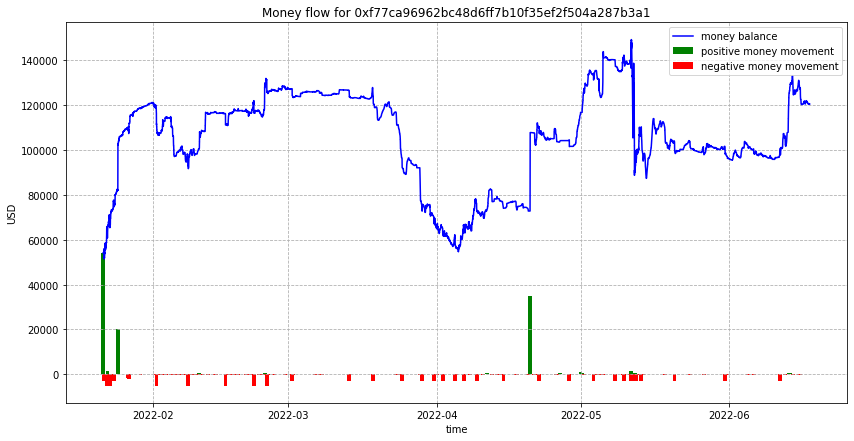

In [58]:
money_at_time_trader(master_trader_df, address="0xf77ca96962bc48d6ff7b10f35ef2f504a287b3a1", xsize=14, ysize=7)

Conform the presented charts was discovered that there are normal addresses with simple traders and some unique cases when money balance goes to minus. Those unique cases match with addresses with strange behavior that were supposed to be system-related

So, here comes the next step - finding an activated amount of buying power (or used leverage) based on capitalization of position and money balance at the moment of time.

# Finding active buying power (leverage) and ratio of the pool to this power

## First try on one trader

In [60]:
trader_df = master_trader_df[master_trader_df["trader"] == "0xf77ca96962bc48d6ff7b10f35ef2f504a287b3a1"]
trader_df.fillna(0, inplace=True)
trader_df["money_movement"] = (trader_df["deposit"] - trader_df["withdraw"] + 
                                   trader_df["realized_pnl"] + trader_df["funding_payment"])
trader_df["money_balance"] = trader_df["money_movement"].cumsum()
trader_df

,trader,exchanged_position_size,exchanged_position_notional,fee,open_notional,realized_pnl,position_size_after,swapped_price,entry_price_after,market_price_after,...,daily_funding_rate,deposit,withdraw,liquidator,liquidation_fee,position_size_abs,position_notional_abs,block_number,money_movement,money_balance
159175,0xf77ca96962bc48d6ff7b10f35ef2f504a287b3a1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,54000.0,0.0,0,0.0,0.0,0.0,0.0,54000.00000,54000.000000
159205,0xf77ca96962bc48d6ff7b10f35ef2f504a287b3a1,0.084103,-9.990000,0.010000,-10.000000,0.00000,0.084103,118.783391,118.902293,118.783424,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00000,54000.000000
159207,0xf77ca96962bc48d6ff7b10f35ef2f504a287b3a1,-0.084103,9.990000,0.009990,0.000000,-0.01999,0.000000,118.783391,0.000000,118.783357,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,-0.01999,53999.980010
159280,0xf77ca96962bc48d6ff7b10f35ef2f504a287b3a1,-42.042051,5012.631678,5.012632,5007.619047,0.00000,-42.042051,119.228999,119.109770,119.212296,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00000,53999.980010
159284,0xf77ca96962bc48d6ff7b10f35ef2f504a287b3a1,-41.999939,5006.208438,5.006208,10008.821276,0.00000,-84.041990,119.195613,119.093102,119.178933,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00000,53999.980010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7522740,0xf77ca96962bc48d6ff7b10f35ef2f504a287b3a1,-10.969842,347.075147,0.347075,7566.148761,0.00000,-241.002076,31.639028,31.394538,31.625538,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00000,120582.109891
7522741,0xf77ca96962bc48d6ff7b10f35ef2f504a287b3a1,-21.010221,663.917357,0.663917,8229.402200,0.00000,-262.012297,31.599732,31.408458,31.573947,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00000,120582.109891
7522744,0xf77ca96962bc48d6ff7b10f35ef2f504a287b3a1,-24.011890,757.443786,0.757444,8986.088542,0.00000,-286.024187,31.544530,31.417233,31.515141,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00000,120582.109891
7522745,0xf77ca96962bc48d6ff7b10f35ef2f504a287b3a1,-23.999913,755.656968,0.755657,9740.989853,0.00000,-310.024100,31.485821,31.420105,31.456528,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00000,120582.109891


In [64]:
trader_df["position_to_balance_perc"] = (trader_df["open_notional"] / trader_df["money_balance"]) * 100
trader_df

,trader,exchanged_position_size,exchanged_position_notional,fee,open_notional,realized_pnl,position_size_after,swapped_price,entry_price_after,market_price_after,...,withdraw,liquidator,liquidation_fee,position_size_abs,position_notional_abs,block_number,money_movement,money_balance,position_to_balance,position_to_balance_perc
159175,0xf77ca96962bc48d6ff7b10f35ef2f504a287b3a1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0,0.0,0.0,0.0,0.0,54000.00000,54000.000000,0.000000,0.000000
159205,0xf77ca96962bc48d6ff7b10f35ef2f504a287b3a1,0.084103,-9.990000,0.010000,-10.000000,0.00000,0.084103,118.783391,118.902293,118.783424,...,0.0,0,0.0,0.0,0.0,0.0,0.00000,54000.000000,-0.000185,-0.018519
159207,0xf77ca96962bc48d6ff7b10f35ef2f504a287b3a1,-0.084103,9.990000,0.009990,0.000000,-0.01999,0.000000,118.783391,0.000000,118.783357,...,0.0,0,0.0,0.0,0.0,0.0,-0.01999,53999.980010,0.000000,0.000000
159280,0xf77ca96962bc48d6ff7b10f35ef2f504a287b3a1,-42.042051,5012.631678,5.012632,5007.619047,0.00000,-42.042051,119.228999,119.109770,119.212296,...,0.0,0,0.0,0.0,0.0,0.0,0.00000,53999.980010,0.092734,9.273372
159284,0xf77ca96962bc48d6ff7b10f35ef2f504a287b3a1,-41.999939,5006.208438,5.006208,10008.821276,0.00000,-84.041990,119.195613,119.093102,119.178933,...,0.0,0,0.0,0.0,0.0,0.0,0.00000,53999.980010,0.185349,18.534861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7522740,0xf77ca96962bc48d6ff7b10f35ef2f504a287b3a1,-10.969842,347.075147,0.347075,7566.148761,0.00000,-241.002076,31.639028,31.394538,31.625538,...,0.0,0,0.0,0.0,0.0,0.0,0.00000,120582.109891,0.062747,6.274686
7522741,0xf77ca96962bc48d6ff7b10f35ef2f504a287b3a1,-21.010221,663.917357,0.663917,8229.402200,0.00000,-262.012297,31.599732,31.408458,31.573947,...,0.0,0,0.0,0.0,0.0,0.0,0.00000,120582.109891,0.068247,6.824729
7522744,0xf77ca96962bc48d6ff7b10f35ef2f504a287b3a1,-24.011890,757.443786,0.757444,8986.088542,0.00000,-286.024187,31.544530,31.417233,31.515141,...,0.0,0,0.0,0.0,0.0,0.0,0.00000,120582.109891,0.074523,7.452257
7522745,0xf77ca96962bc48d6ff7b10f35ef2f504a287b3a1,-23.999913,755.656968,0.755657,9740.989853,0.00000,-310.024100,31.485821,31.420105,31.456528,...,0.0,0,0.0,0.0,0.0,0.0,0.00000,120582.109891,0.080783,8.078304


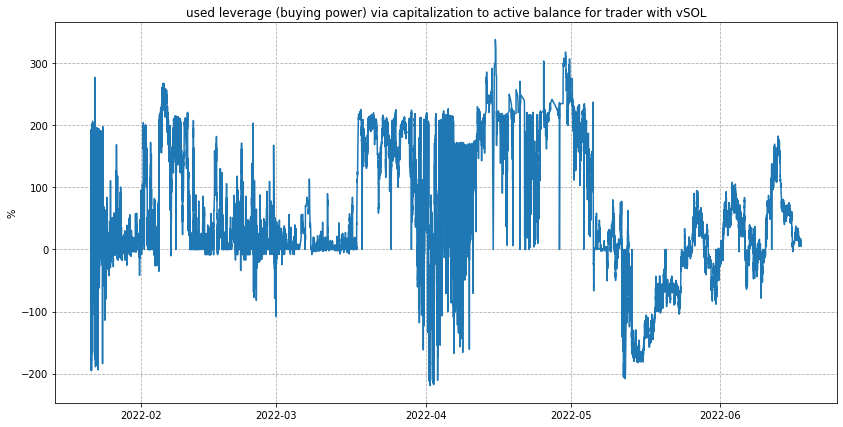

In [67]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(trader_df["time"], trader_df["position_to_balance_perc"])
ax.set_ylabel("%")
ax.grid(True, linestyle='--')
ax.set_title("used leverage (buying power) via capitalization to active balance for trader with vSOL")
plt.show()

## Second try on another trader

In [74]:
trader_df = master_trader_df[master_trader_df["trader"] == "0xdab8a2e0b213ec8447d4f7cdb783d53ed3428b7a"]
trader_df.fillna(0, inplace=True)
trader_df["money_movement"] = (trader_df["deposit"] - trader_df["withdraw"] + 
                                   trader_df["realized_pnl"] + trader_df["funding_payment"])
trader_df["money_balance"] = trader_df["money_movement"].cumsum()
trader_df["position_to_balance_perc"] = (trader_df["open_notional"] / trader_df["money_balance"]) * 100
trader_df["pool_name"].unique()

array([0, 'vONE', 'vFTM', 'vNEAR', 'vSAND', 'vATOM'], dtype=object)

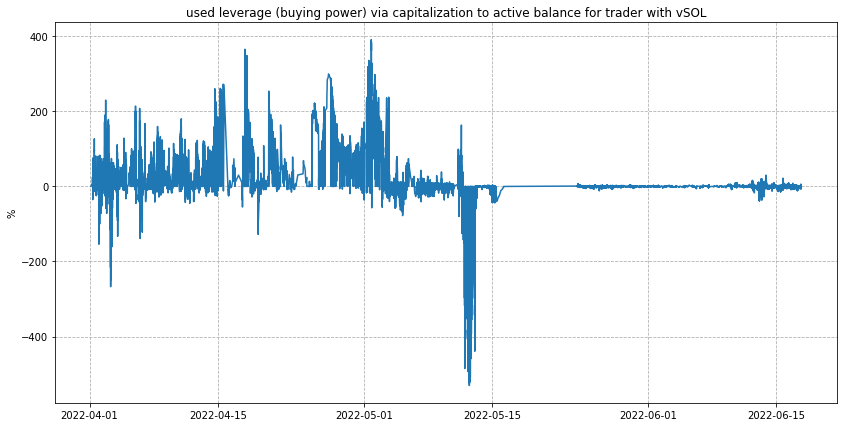

In [75]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(trader_df["time"], trader_df["position_to_balance_perc"])
ax.set_ylabel("%")
ax.grid(True, linestyle='--')
ax.set_title("used leverage (buying power) via capitalization to active balance for trader with vSOL")
plt.show()

The second case demonstrates several important aspects:

1. Here also is observable that there is no pool that goes out of the possible buying power, but there are different pool, meaning that there is a need to color plots depending on the pool;
2. It is required to see overall used buying power;

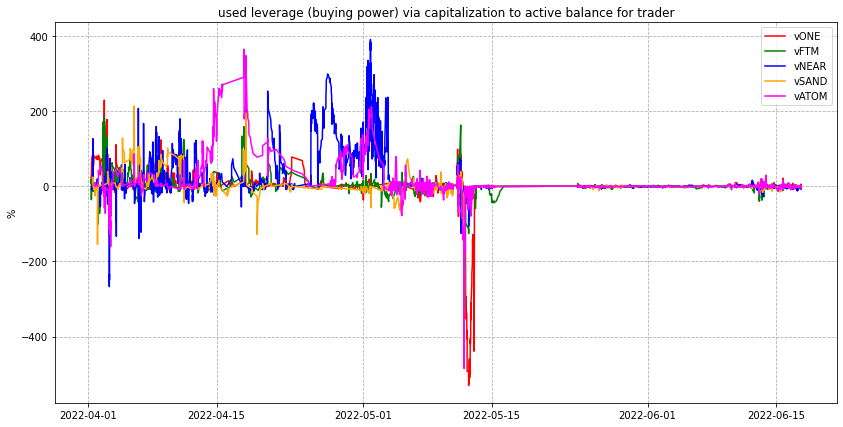

In [77]:
fig, ax = plt.subplots(figsize=(14, 7))
one_trader_df = trader_df[trader_df["pool_name"] == "vONE"]
ftm_trader_df = trader_df[trader_df["pool_name"] == "vFTM"]
near_trader_df = trader_df[trader_df["pool_name"] == "vNEAR"]
sand_trader_df = trader_df[trader_df["pool_name"] == "vSAND"]
atom_trader_df = trader_df[trader_df["pool_name"] == "vATOM"]

ax.plot(one_trader_df["time"], one_trader_df["position_to_balance_perc"], color='r', label='vONE')
ax.plot(ftm_trader_df["time"], ftm_trader_df["position_to_balance_perc"], color='g', label='vFTM')
ax.plot(near_trader_df["time"], near_trader_df["position_to_balance_perc"], color='b', label='vNEAR')
ax.plot(sand_trader_df["time"], sand_trader_df["position_to_balance_perc"], color='orange', label='vSAND')
ax.plot(atom_trader_df["time"], atom_trader_df["position_to_balance_perc"], color='magenta', label='vATOM')

ax.legend()
ax.set_ylabel("%")
ax.grid(True, linestyle='--')
ax.set_title("used leverage (buying power) via capitalization to active balance for trader")
plt.show()

## Automatization of the leverage (buying power) calculation and visualization

In [81]:
def buying_power_visualize(trading_df: pd.DataFrame, trader: str, xsize: int=14, ysize: int=7):
    trader_df = trading_df[trading_df["trader"] == trader]
    trader_df.fillna(0, inplace=True)
    trader_df["money_movement"] = (trader_df["deposit"] - trader_df["withdraw"] + 
                                    trader_df["realized_pnl"] + trader_df["funding_payment"])
    trader_df["money_balance"] = trader_df["money_movement"].cumsum()
    trader_df = trader_df[trader_df["open_notional"] != 0]
    trader_df = trader_df[trader_df["pool_name"] != 0]
    trader_df["position_to_balance_perc"] = (trader_df["open_notional"] / trader_df["money_balance"]) * 100
    
    fig, ax = plt.subplots(figsize=(xsize, ysize))
    cmap = get_cmap(len(trader_df["pool_name"].unique()))
    index = 0
    for token in trader_df["pool_name"].unique():
        token_trader_df = trader_df[trader_df["pool_name"] == token]
        ax.plot(token_trader_df["time"], token_trader_df["position_to_balance_perc"], color=cmap(index), label=token)
        ax.set_ylabel("%")
        index += 1
        
    ax.grid(True, linestyle='--')
    ax.legend()
    ax.set_title("Distribution of applied buying power per pool for " + trader)
    plt.show()

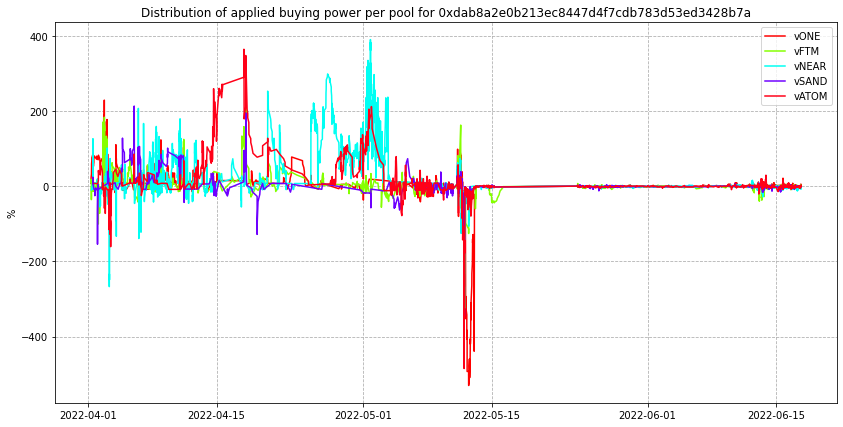

In [82]:
buying_power_visualize(master_trader_df, "0xdab8a2e0b213ec8447d4f7cdb783d53ed3428b7a")

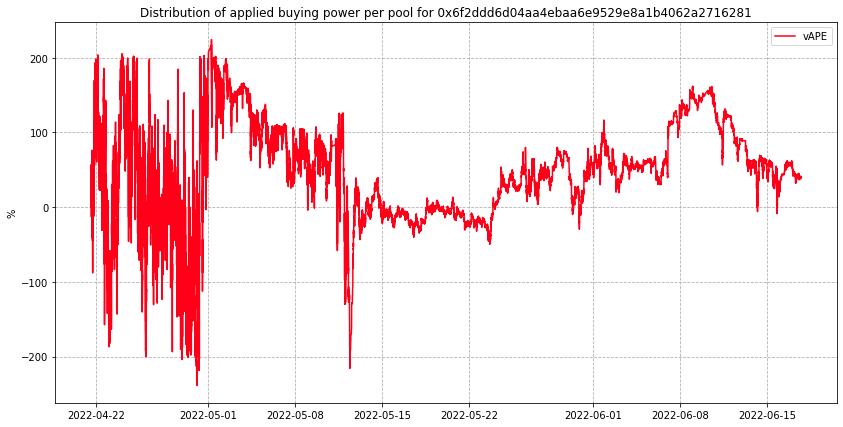

In [83]:
buying_power_visualize(master_trader_df, "0x6f2ddd6d04aa4ebaa6e9529e8a1b4062a2716281")

# The end